# Introduction

- **Objective** - Predict daily sales of products using time series analysis and ML techniques.
- **Significance** - Showcase the importance of forecasting in the retail sector.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Dataset:
data = pd.read_csv('Superstore.csv', encoding='ISO-8859-1')

data.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [2]:
# data.info()

# Exploratory Data Analysis

EDA is a fundamental step in the data analysis process. It involves visualizing, summarizing, and interpreting the information that is hidden in rows and columns of data. The main goal of EDA is to understand the data, find patterns, spot anomalies, test hypotheses, and check assumptions.

For our dataset, we will do the following:

1. **DataSet Overview**

2. **Data Visualization**

3. **Descriptive Statistics**

4. **Time Series Visualization**

5. **Time Series Decomposition**

## I. DataSet Overview

In [3]:
# Dataset structure: number of rows and columns
dataset_shape = data.shape

# Check for missing values
missing_values = data.isnull().sum()

# Overview of the classifications for each categorical feature
classifications = {}
categorical_features = ['Category', 'Sub-Category', 'Segment', 'Region', 'Ship Mode']
for feature in categorical_features:
    classifications[feature] = data[feature].value_counts()

# dataset_shape, missing_values, classifications

1. **Dataset Structure**: The dataset contains 9,994 rows (entries) and 21 columns (features).
2. **Missing Values**: There are no missing values in any of the columns.   

## II. Data Visualization
### 1.) Distribution of Data Features:

Visualizing the distribution of data features helps in understanding the underlying structure and pattern of the data. It reveals aspects such as skewness or the presence of any outliers. 

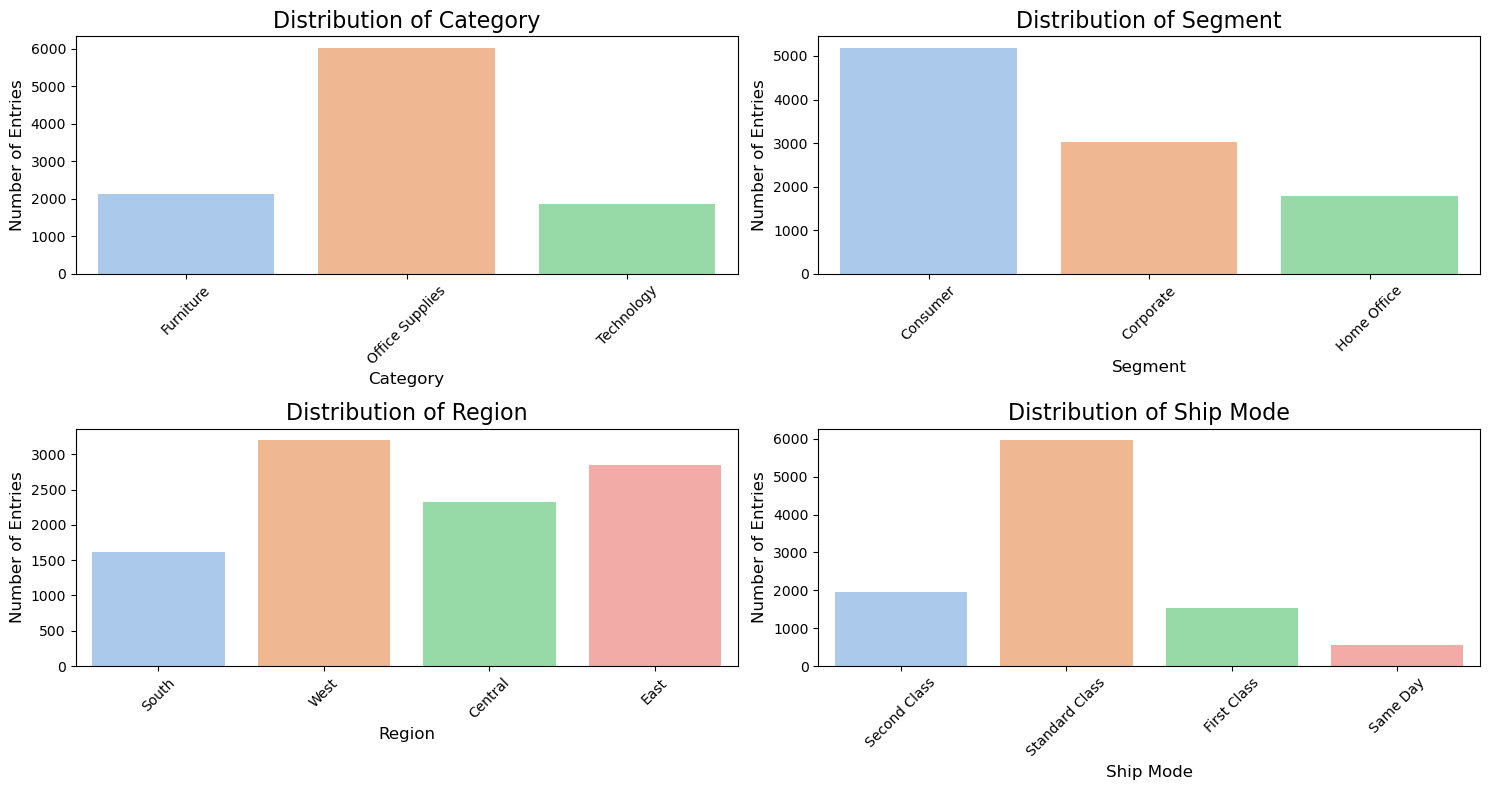

In [4]:
plt.figure(figsize=(15, 8))
features_to_plot = ['Category', 'Segment', 'Region', 'Ship Mode']

for idx, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 2, idx)
    sns.countplot(data=data, x=feature, palette='pastel')
    plt.title(f'Distribution of {feature}', fontsize=16)
    plt.ylabel('Number of Entries', fontsize=12)
    plt.xlabel(feature, fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()

    
# Save the figure to the specified path
plt.savefig('Distribution of Data Features.png')
    
plt.show()

***From the bar plots; we can see that:***
- **Category:** "Office Supplies" has the highest number of entries, followed by "Furniture" and "Technology".
- **Segment:** "Consumer" leads, with "Corporate" and "Home Office" following.
- **Region:** The "West" region has the most entries, followed by "East", "Central", and "South". Of all the categories; the distribution of Region is the most evenly distributed. 
- **Ship Mode:** "Standard Class" is the most common shipping mode, with "Second Class", "First Class", and "Same Day" in descending order.

### 2.) Distribution of Sub-Categories

Analyzing the distribution of Sub-Categories provides insights into the product mix, popularity of different products, and potential market opportunities or challenges. It allows businesses to understand customer preferences and align their strategies accordingly.

#### A.) Sales and Profit by Sub-Category

In [5]:
# Grouping data by 'Sub-Category' and 'Category' to get relevant data
grouped_data = data.groupby(['Sub-Category', 'Category']).agg({'Sales': 'sum', 'Profit': 'sum', 'Quantity': 'sum'}).reset_index()

# Sorting values by 'Category' and then by 'Sales' for better visualization
grouped_data = grouped_data.sort_values(by=['Category', 'Sales'], ascending=[True, False])

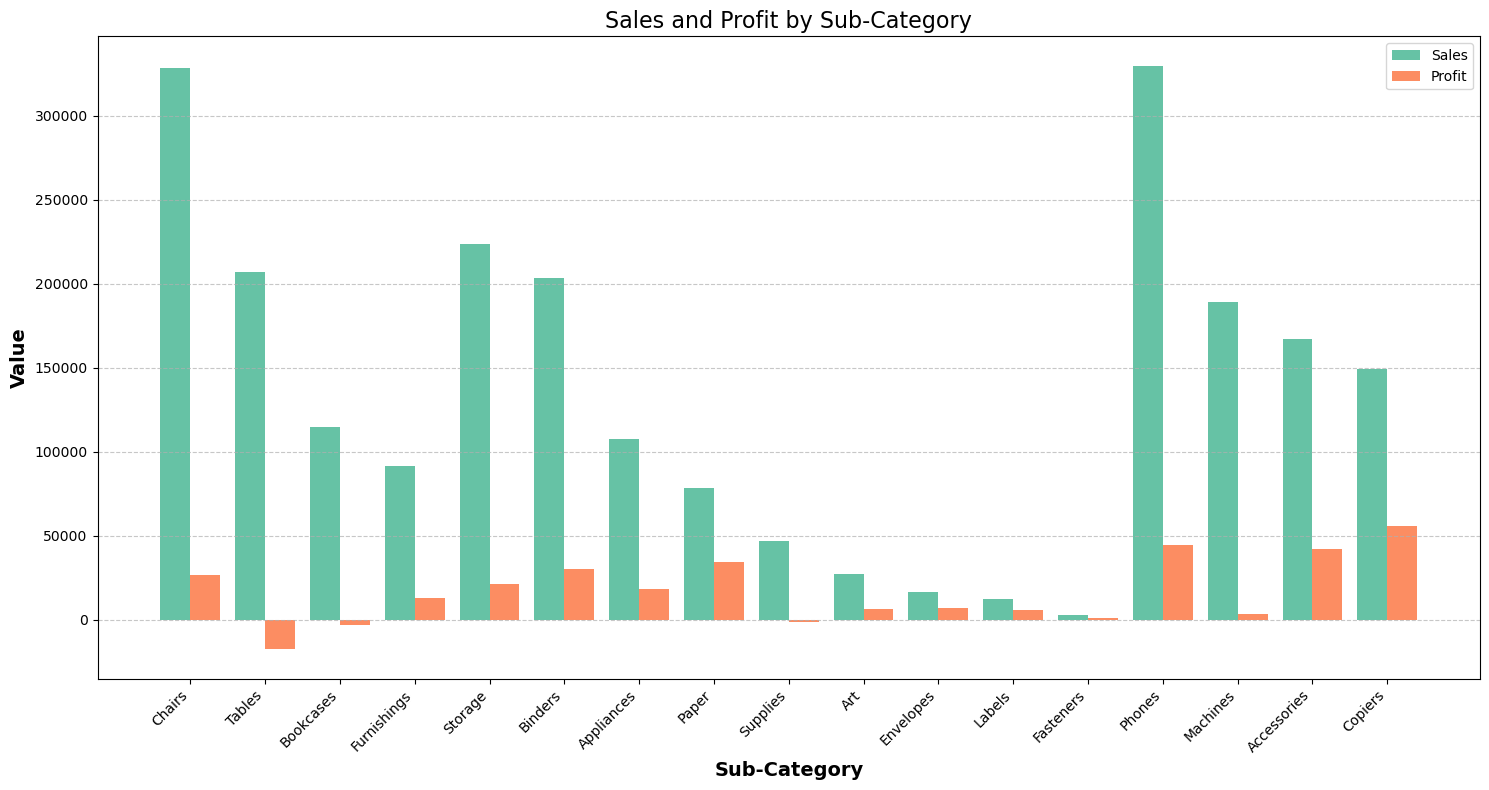

In [6]:
# Creating a figure and axis for Sales graph
plt.figure(figsize=(15,8))

# Grouped bar plot for Sales
sns.set_palette("Set2")
bar_width = 0.4
r1 = np.arange(len(grouped_data))
r2 = [x + bar_width for x in r1]

plt.bar(r1, grouped_data['Sales'], width=bar_width, label='Sales')
plt.bar(r2, grouped_data['Profit'], width=bar_width, label='Profit')

# Adding labels and titles
plt.xlabel('Sub-Category', fontweight='bold', fontsize=14)
plt.ylabel('Value', fontweight='bold', fontsize=14)
plt.xticks([r + bar_width/2 for r in range(len(grouped_data))], grouped_data['Sub-Category'], rotation=45, ha='right')
plt.title('Sales and Profit by Sub-Category', fontsize=16)
plt.legend()

# Adding grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Improving spacing and layout
plt.tight_layout()

# Save the figure to the specified path
plt.savefig('Sales and Profit by Sub-Category.png')

# Display the Sales plot
plt.show()

***Analysis of Sales and Profit by Sub-Category:***
- **Sales:** From the graph, we can identify the Sub-Categories with the highest sales. It appears that 'Chairs', 'Tables','Phones' and 'Storage' are among the top performers in terms of sales.
- **Profitability:** Not all high sales correspond to high profits. For example, while 'Tables' has significant sales, it shows negative profit, indicating a loss in that Sub-Category. Furthermore; high sales also don't yield the highest profit; with Coppiers and Accesories having the same profit as Phones; but selling significantly less. Howecer; Electronics clearly have the highes Sales to Profit ratio; followed by Office Supplies and Furniture.
- **Future Investigation:** Some Sub-Categories like 'Bookcases' and 'Furnishings' have relatively lower sales but have profits. It would be interisting to investigate why some Sub-Categories are more profitable than others despite lower sales.

#### B.) Quantity and Number of Saled by Sub-Category

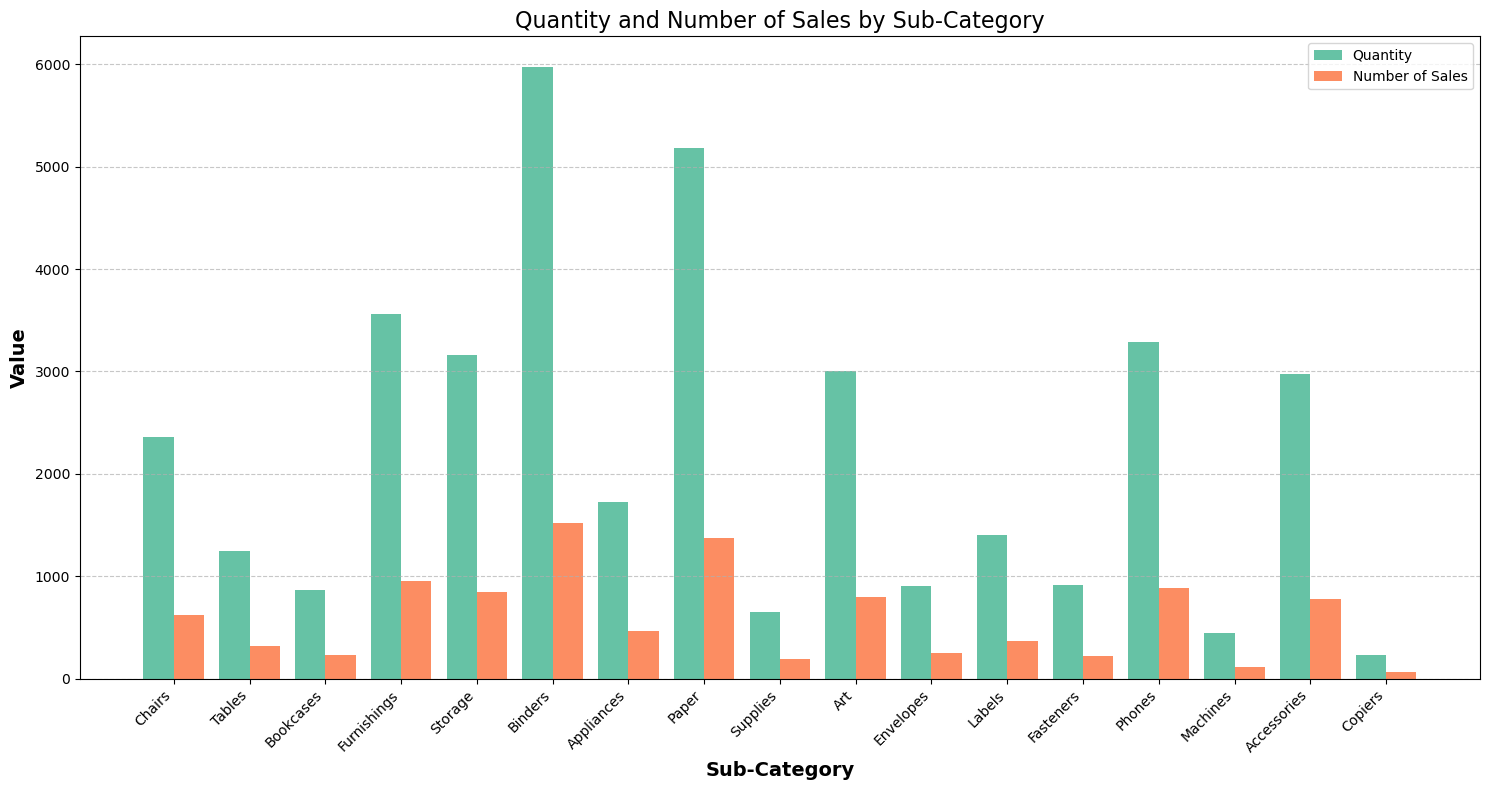

In [7]:
subcategory_sales_count = data['Sub-Category'].value_counts()

# Creating a figure and axis for Quantity and Number of Sales graph
plt.figure(figsize=(15, 8))

# Grouped bar plot for Quantity and Number of Sales
bar_width = 0.4
r1 = np.arange(len(grouped_data))
r2 = [x + bar_width for x in r1]

plt.bar(r1, grouped_data['Quantity'], width=bar_width, label='Quantity')
plt.bar(r2, subcategory_sales_count[grouped_data['Sub-Category'].values].values, width=bar_width, label='Number of Sales')

# Adding labels and titles
plt.xlabel('Sub-Category', fontweight='bold', fontsize=14)
plt.ylabel('Value', fontweight='bold', fontsize=14)
plt.xticks([r + bar_width/2 for r in range(len(grouped_data))], grouped_data['Sub-Category'], rotation=45, ha='right')
plt.title('Quantity and Number of Sales by Sub-Category', fontsize=16)
plt.legend()

# Adding grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Improving spacing and layout
plt.tight_layout()

# Save the figure to the specified path
plt.savefig('Quantity and Number of Saled by Sub-Category.png')

# Display the Quantity and Number of Sales plot
plt.show()


***Analysis of Quantity and Number of Sales by Sub-Category:***
- **Quantity:** From the graph, we can identify the Sub-Categories with the highest quanity sold. It appears that 'Binders', 'Paper' outperforming all others; which is sensible since Office Supplies had the highest quantity sold. 
- **Sales:** The graph juxtaposes the total quantity sold with the number of individual sales transactions. Some Sub-Categories, like 'Binders', show a high number of sales transactions but relatively lower quantities, possibly indicating infrequent purchases of high quantities. These types of purchases appear more common for Office Supplies, which may have been made companies resupplying Office Supplies; however further investigation would be needed.

### 3,) Correlation Map

A correlation heatmap helps us understand the relationships between numerical columns. Correlation values range from -1 to 1, where -1 indicates a strong negative relationship, 1 indicates a strong positive relationship, and 0 indicates no relationship.

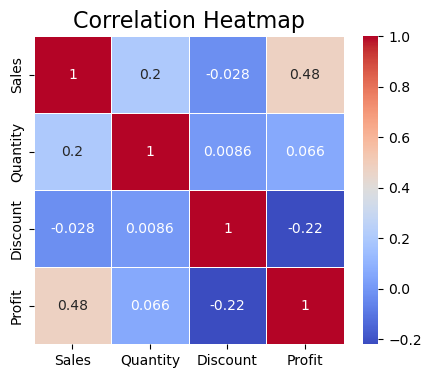

In [8]:
data2 = data[['Sales', 'Quantity', 'Discount', 'Profit']]

# Calculating the correlation matrix for numerical columns
correlation_matrix = data2.corr(numeric_only = True)

# Creating a heatmap to visualize the correlations
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap', fontsize=16)

# Save the figure to the specified path
plt.savefig('Correlation Map.png')

plt.show()

***Analysis of Correlation Heatmap***:
- **Sales and Profit:** There is a positive correlation between sales and profit, indicating that higher sales generally lead to higher profits.
- **Discount and Profit:** There is a negative correlation between discount and profit, suggesting that higher discounts might lead to lower profits.
- **Sales and Quantity:** A positive correlation between sales and quantity shows that higher quantities sold are associated with higher sales.

Most of the conclusions above are intuitive and reasonable.

### 4.) Analysis of Outliers:

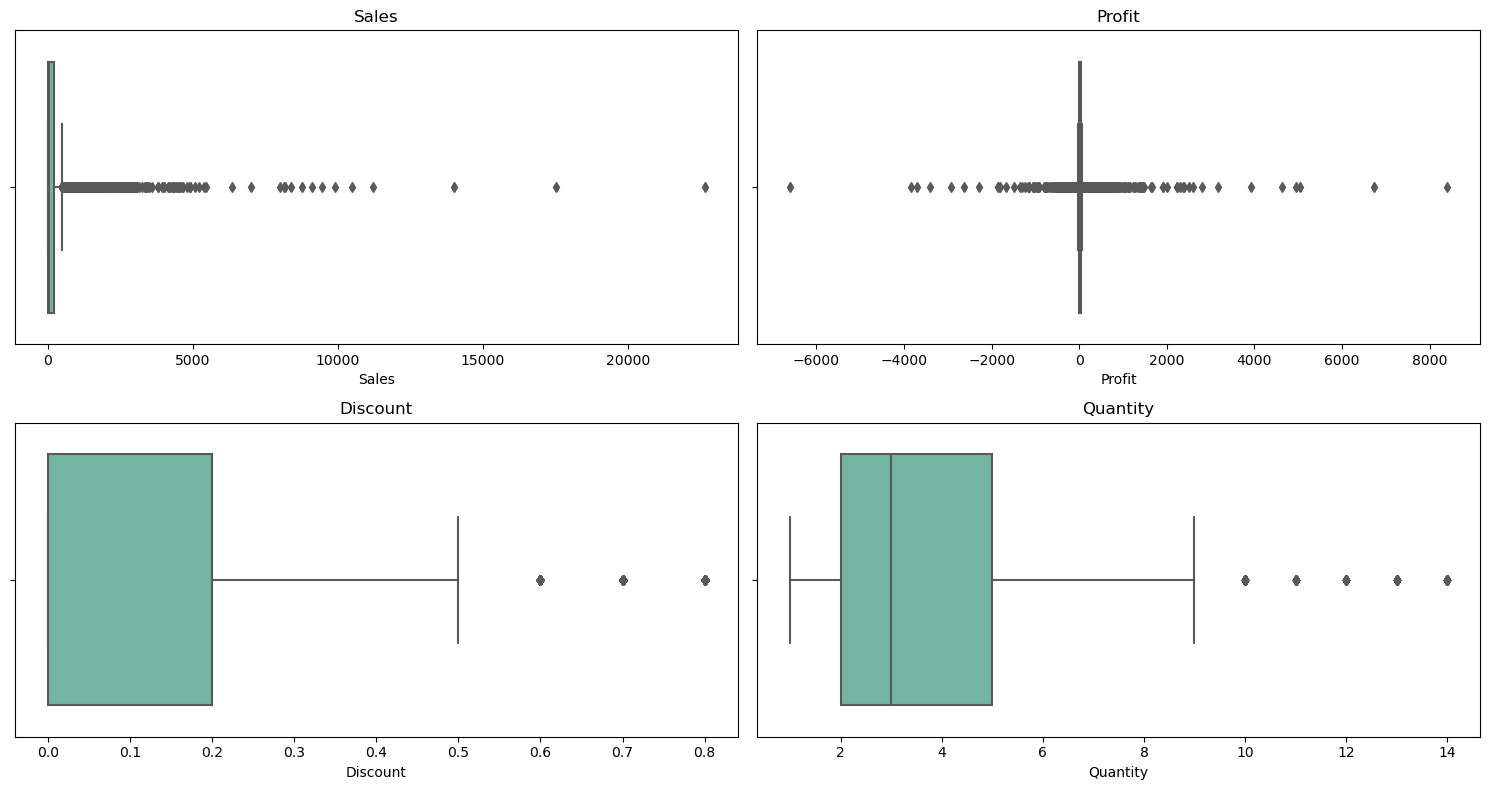

In [9]:
# Creating box plots for sales, profit, discount, and quantity to visualize outliers
fig, axes = plt.subplots(2, 2, figsize=(15, 8))

sns.boxplot(x=data['Sales'], ax=axes[0, 0])
axes[0, 0].set_title('Sales')

sns.boxplot(x=data['Profit'], ax=axes[0, 1])
axes[0, 1].set_title('Profit')

sns.boxplot(x=data['Discount'], ax=axes[1, 0])
axes[1, 0].set_title('Discount')

sns.boxplot(x=data['Quantity'], ax=axes[1, 1])
axes[1, 1].set_title('Quantity')

plt.tight_layout()

# Save the figure to the specified path
plt.savefig('Analysis of Outliers.png')

plt.show()

***Analysis of Outliers for Sales, Profit, Discount, and Quantity***:
- **Sales:** The majority of sales lie within a relatively small range, but there are several outliers, indicating some unusually high sales values.
- **Profit:** There are outliers on both sides, suggesting instances of both unusually high profits and significant losses.
- **Discounts:** Most of the data is clustered around lower discount values, with some outliers representing higher discounts.
- **Quantity:** The quantity variable seems to have a more regular distribution, with a few outliers representing larger quantities.

***Insights and Future Actions***: *Data Science Component*
- **Sales and Profit Outliers:** Investigating the reasons behind unusually high sales and profits or significant losses can uncover underlying business factors, such as pricing strategies, marketing campaigns, or customer behavior.
- **High Discount Outliers:** Understanding why certain transactions have higher discounts may reveal insights into promotional strategies or customer segmentation.
- **Quantity Outliers:** Analyzing large quantity transactions can provide information about bulk purchases or popular products.

## III. Descriptive Statistics

- **Mean:** The mean gives us the average value, helping us understand the typical value for each variable. It's useful for assessing the overall trend.
- **Median:** The median gives us the middle value in the dataset, which is valuable when dealing with skewed distributions or outliers. It's a more robust measure of central tendency.
- **Standard Deviation:** This measures the spread of the data around the mean. A higher standard deviation indicates greater variability. It helps us understand how much individual data points deviate from the average.
- **Minimum and Maximum:** These values provide the range of the data, showing the extent of values for each variable. They help identify potential outliers.

In [10]:
# Computing descriptive statistics for sales, profit, discount, and quantity
descriptive_stats = data[['Sales', 'Profit', 'Discount', 'Quantity']].describe().transpose()
descriptive_stats

,count,mean,std,min,25%,50%,75%,max
Sales,9994.0,229.858001,623.245101,0.444,17.28000,54.4900,209.940,22638.480
Profit,9994.0,28.656896,234.260108,-6599.978,1.72875,8.6665,29.364,8399.976
Discount,9994.0,0.156203,0.206452,0.000,0.00000,0.2000,0.200,0.800
Quantity,9994.0,3.789574,2.225110,1.000,2.00000,3.0000,5.000,14.000


## IV. Time Series Visualization

### 1.) Visualization of Daily Sales: [2014 - 2017] - 1 Plot
This plot helps us visualize sales trends and identify any patterns or anomalies in the sales data. Regular peaks or troughs suggest seasonality, while abrupt changes might indicate events or anomalies. The `.resample('D')` operation is part of the Pandas library and is used to change the frequency of time series data. Specifically, 'D' stands for daily frequency. This operation aggregates and transforms the data into a new time series with a daily frequency, making it more consistent and manageable. It can help in handling irregular or higher-frequency data; however it's important to keep in mind that it can also lead to loss of information and overfitting.

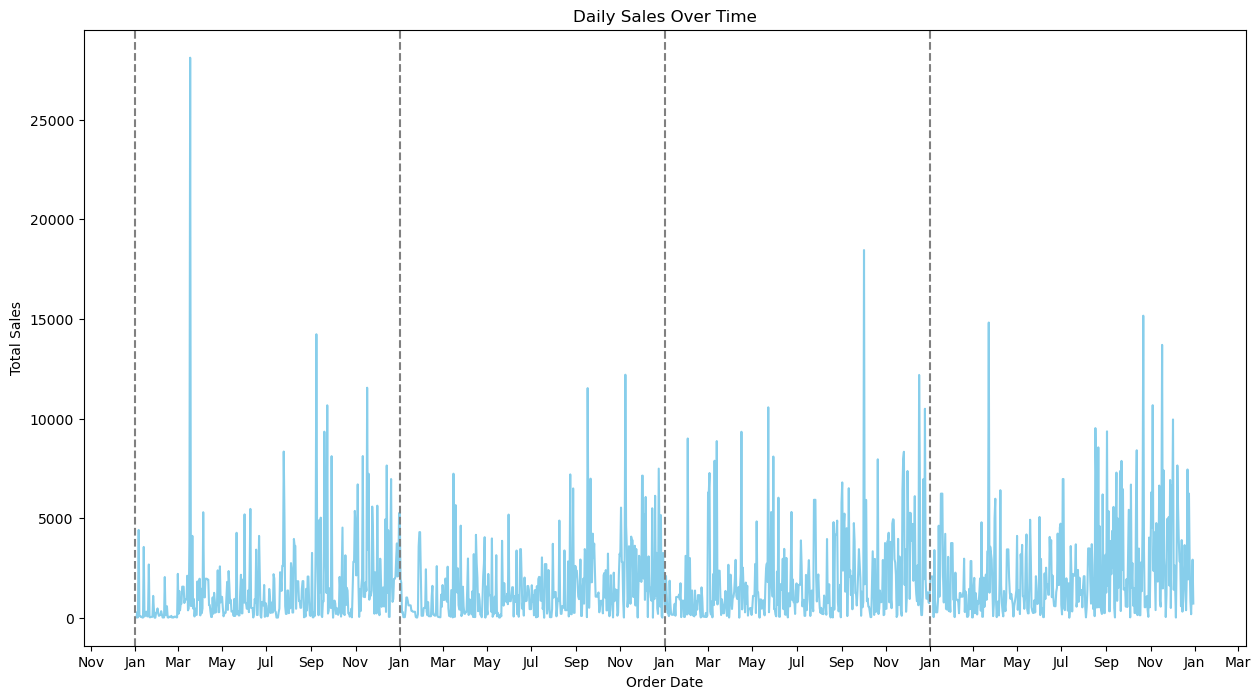

In [11]:
# Importing the necessary module for date formatting
import matplotlib.dates as mdates

# Convert data into Date Object Class in Python
data["Order Date"] = pd.to_datetime(data["Order Date"])

# Group by "Order Date" and sum up the sales for each date
daily_sales_resampled = data.groupby("Order Date").sum(numeric_only=True)["Sales"].resample('D').ffill()

# Plot the daily sales
plt.figure(figsize=(15, 8))
plt.plot(daily_sales_resampled, color='skyblue')

# Setting the title
plt.title("Daily Sales Over Time")

# Displaying every other month on the x-axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1, 13, 2)))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Adding vertical dashed lines to separate each year
for year in range(data["Order Date"].dt.year.min(), data["Order Date"].dt.year.max() + 1):
    plt.axvline(pd.Timestamp(f'{year}-01-01'), color='gray', linestyle='--')

plt.xlabel("Order Date")
plt.ylabel("Total Sales")

# Save the figure to the specified path
plt.savefig('Visualization of Daily Sales - 1 Plot.png')

plt.show()

The daily sales plot showcases variations in sales over time. We can notice patterns indicating potential weekly seasonality, as well as some spikes which might be due to specific events or promotions. However it is difficult to see any distinct patterns year-to-year since the data covers the span of 4 years; therefore we will clean up the plot.

### 2.) Visualization of Daily Sales: [2014 - 2017] - Distinct Plots

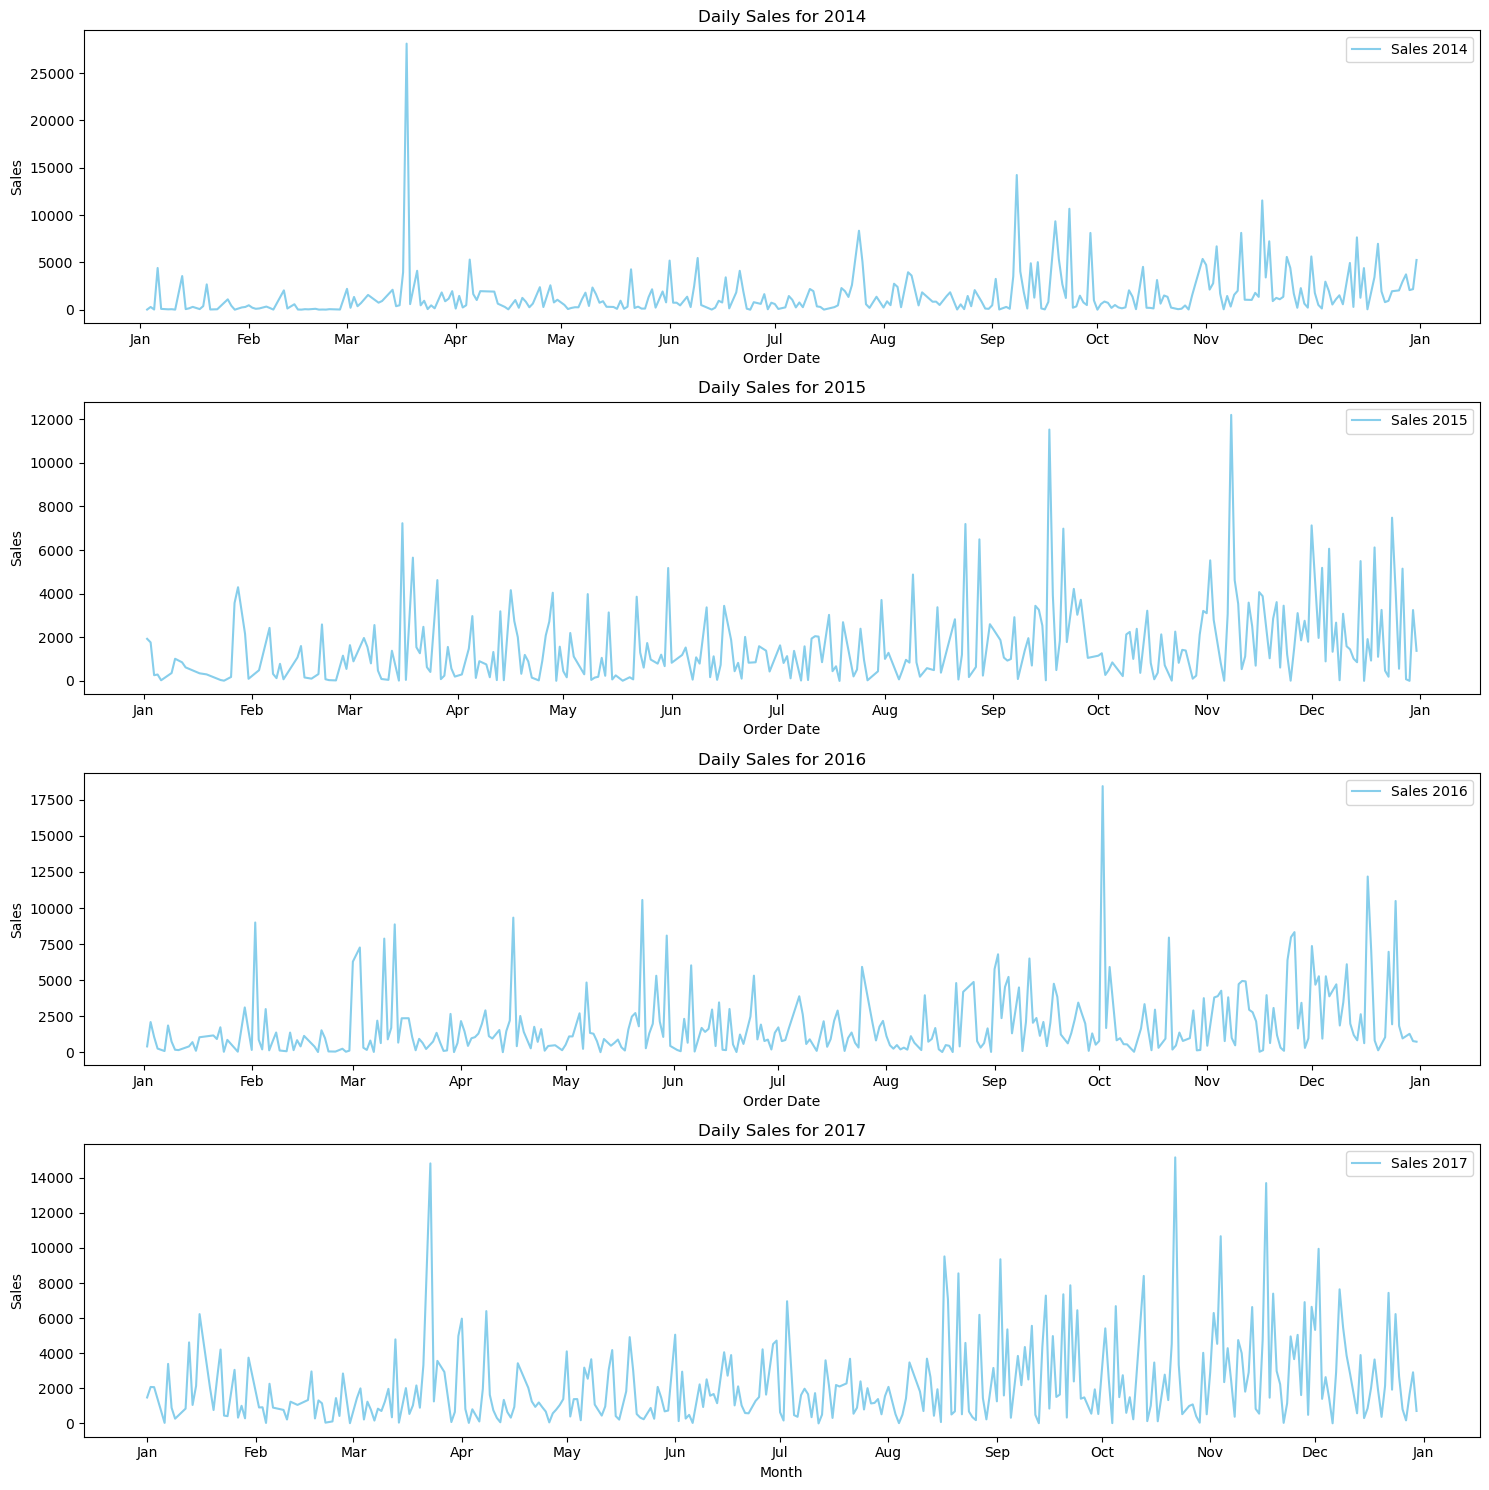

In [12]:
# Extract the year
data['Year'] = data['Order Date'].dt.year

# Redefining the selected years for plotting
selected_years_reload = [2014, 2015, 2016, 2017]

# Setting up the subplots for each year again
fig, axes = plt.subplots(len(selected_years_reload), 1, figsize=(15, 15), sharex=False)

# Plotting sales for each of the selected years using Seaborn
for ax, year in zip(axes, selected_years_reload):
    subset = data[data['Year'] == year]
    daily_sales = subset.groupby('Order Date')['Sales'].sum().reset_index()
    sns.lineplot(x='Order Date', y='Sales', data=daily_sales, label=f'Sales {year}', color='skyblue', ax=ax)
    ax.set_title(f'Daily Sales for {year}')
    ax.set_ylabel('Sales')
    ax.legend()
    ax.xaxis.set_major_locator(mdates.MonthLocator())  # Displaying only months on x-axis
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Displaying month name

plt.xlabel('Month')
plt.tight_layout()

# Save the figure to the specified path
plt.savefig('Visualization of Daily Sales - Distinct Plots.png')

plt.show()


## V. Time Series Decomposition

Time series decomposition involves breaking down a time series into three main components: *Trend Component*, *Seasonal Component*, *Residual Component*. In this section we will explore:
1. Time Series Decomposition - Theory
2. Time Series Decomposition - Application

### 1.) Time Series Decomposition - Theory

The following is the mathematical reasoning and formulas used by the `seasonal_decompose` function from the `statsmodels.tsa.seasonal` module. This function is commonly used for time series analysis to decompose a time series into its constituent components: trend, seasonal, and residual.

The mathematical representation of the time series can be denoted as:

$Y(t) = T(t) + S(t) + R(t)$

Where:
- $Y(t)$ is the observed value at time $t$.
- $T(t)$ is the trend component at time $t$.
- $S(t)$ is the seasonal component at time $t$.
- $R(t)$ is the residual (or irregular) component at time $t$.

The objective of the `seasonal_decompose` function is to estimate these components from the observed time series data.

#### A.) Trend Component:
The trend component represents the long-term movement or underlying structure of the time series. It is typically obtained using methods like moving averages or polynomial fitting. The `seasonal_decompose` function often uses the moving average method to estimate the trend. The formula for estimating the trend at time $t$, denoted as $T(t)$, can be expressed as:

$ T(t) = D_m(t) = \frac{1}{2m} \sum_{j=-m}^{m} Y(t+j) $

Where:
- $D_m(t)$ is the centered moving average of order $m$. 
- $Y(t+j)$ represents the observed value at time $t+j$.
- $m$ is the window size for the moving average.

*Formula Explained* - Moving averages are used to smooth out the short-term fluctuations and highlight the underlying trend. The idea is to take the average of a fixed window of data points around each time point. The centered moving average of order $ m $ means the window size is $ 2m $ and it is centered at time $ t $. That's why in the formula we sum over $ j = -m $ to $ j = m $. The division by $ 2m $ normalizes the sum so that it represents an average. This parameter can be adjusted depending on how smooth or responsive to changes you want the trend line to be.

#### B.) Seasonal Component:
The seasonal component captures the regular pattern that repeats over fixed periods (e.g., daily, monthly, yearly). It represents the cyclic behavior of the time series. The `seasonal_decompose` function estimates the seasonal component by computing the average value of each seasonal period. The formula for estimating the seasonal component at time $t$, denoted as $S(t)$, can be expressed as:

$ S(t) = \frac{1}{n_s} \sum_{k=1}^{n_s} Y(t) $

Where:
- $n_s$ is the number of observations in each seasonal period.

*Formula Explained* - 
To estimate the seasonal effect, we want to calculate the average effect for each seasonal period. In this case, the formula takes the average of $ n_s $ observations within each seasonal period. By dividing by $ n_s $ we normalize the sum, so it represents the average effect over that cycle. The sum over $ k = 1 $ to $ n_s $ effectively captures the repeating pattern within each seasonal cycle, providing a consistent measure of the seasonal effect that can be subtracted from the original time series to de-seasonalize it.


#### C.) Residual Component:
The residual component (or noise component) represents the unexplained variability after removing the trend and seasonal components from the observed time series. It captures the random fluctuations and measurement errors. The formula for estimating the residual component at time $t$, denoted as $R(t)$, is:

$ R(t) = Y(t) - T(t) - S(t) $


### 2.) Time Series Decomposition - Application

Below we use the `seasonal_decompose` method to perform the decomposition. This method requires the frequency of the seasonality to be specified. Since we are working with daily sales data, and we suspect a weekly pattern (7-day cycle), we'll set the period to 7.

#### A.) Time Series Decomposition for 2016

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Preparing the daily sales data for 2016
subset_2016 = data[data['Year'] == 2016]
daily_sales_2016 = subset_2016.groupby('Order Date')['Sales'].sum()

# Performing time series decomposition with a weekly frequency (7-day cycle)
decomposition_2016 = seasonal_decompose(daily_sales_2016, period=7)

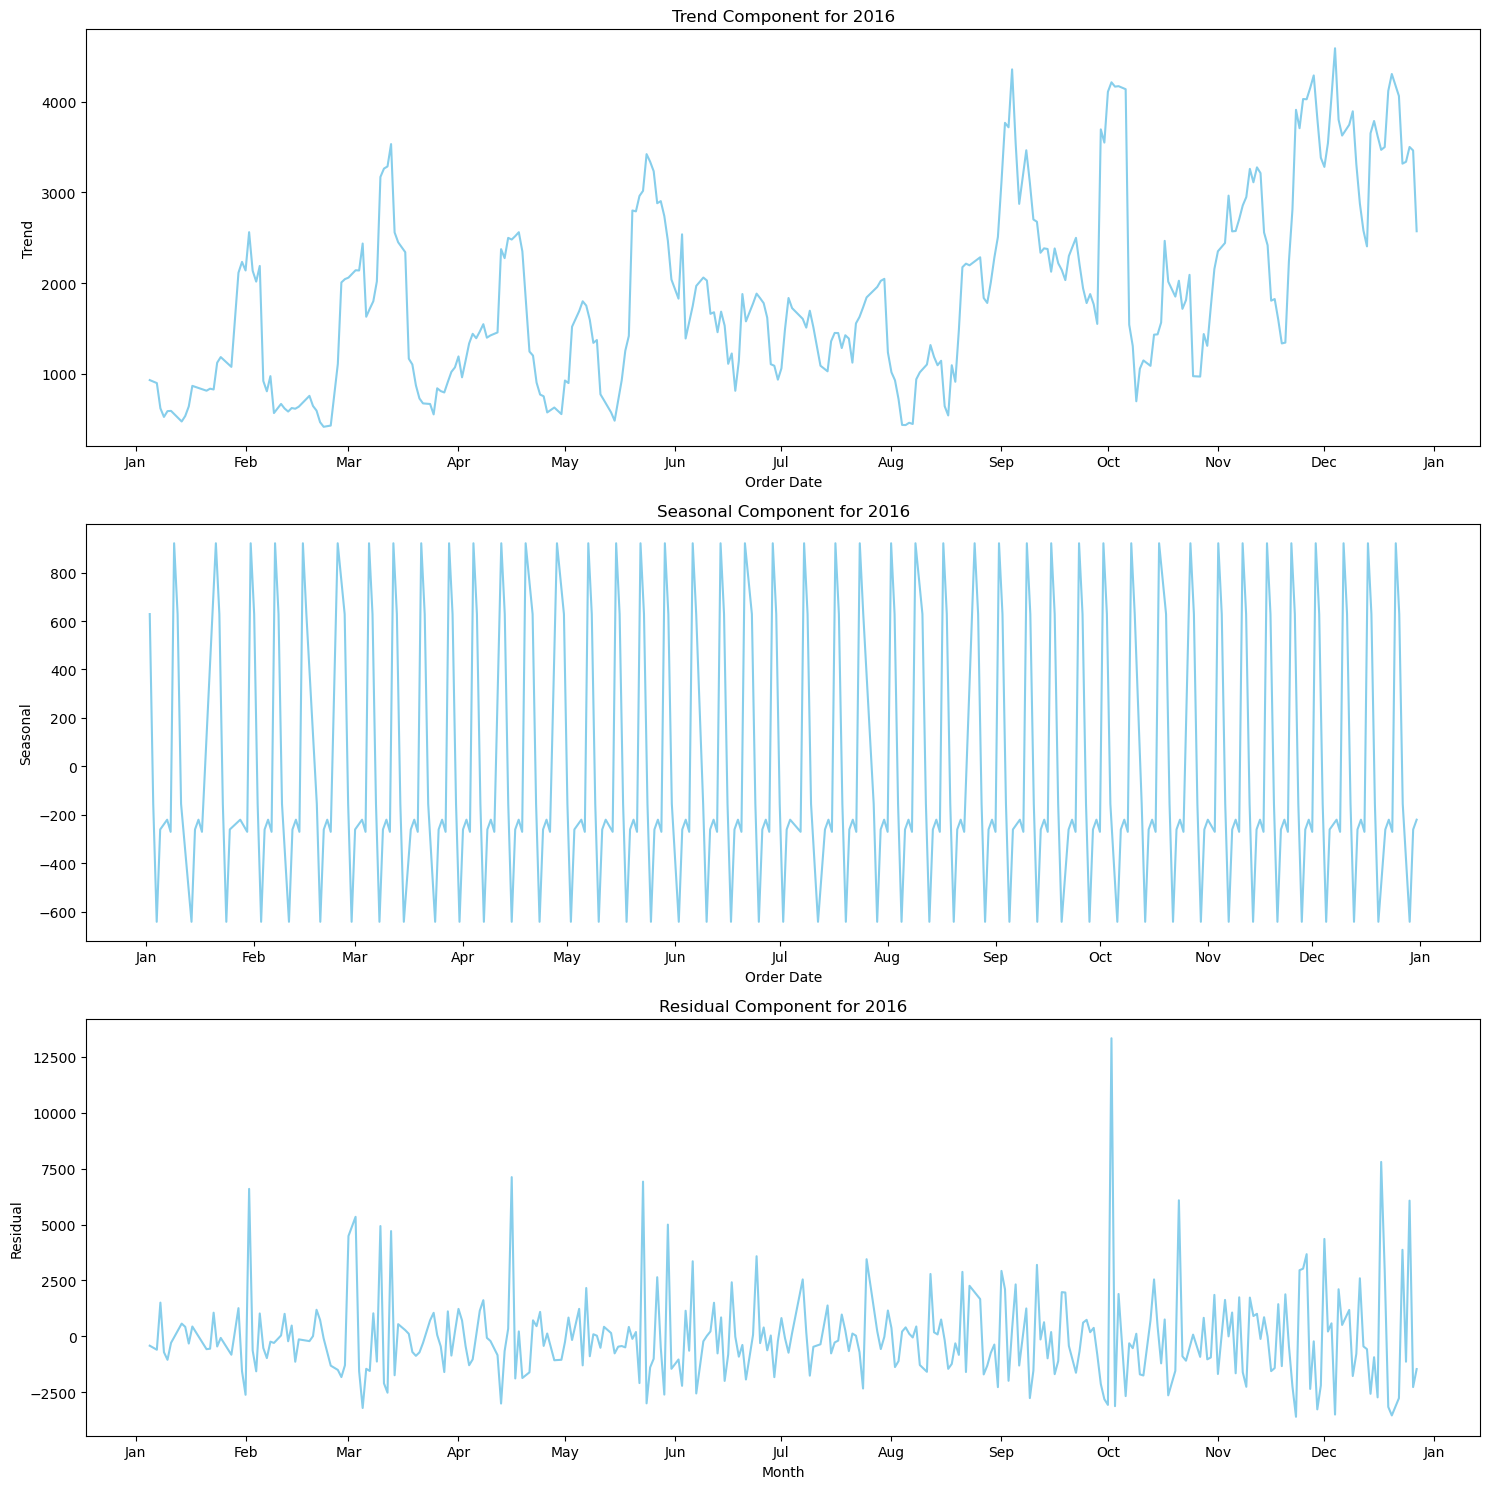

In [14]:
# Setting up the subplots for trend, seasonal, and residual components
fig, axes = plt.subplots(3, 1, figsize=(15, 15), sharex=False)

# Plotting the decomposed components
components = {'Trend': decomposition_2016.trend, 
              'Seasonal': decomposition_2016.seasonal, 
              'Residual': decomposition_2016.resid}

for ax, component in zip(axes, components.items()):
    name, series = component
    sns.lineplot(x=series.index, y=series, color='skyblue', ax=ax)
    ax.set_title(f'{name} Component for 2016')
    ax.set_ylabel(name)
    ax.xaxis.set_major_locator(mdates.MonthLocator())  # Displaying only months on x-axis
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Displaying month name

plt.xlabel('Month')
plt.tight_layout()

# Save the figure to the specified path
plt.savefig('Time Series Decomposition for 2016.png')

plt.show()

***Analysis of Time Series Decomposition for 2016***

**Trend Component:** The trend component is obtained by applying a moving average to smooth out short-term fluctuations. This helps us see the underlying growth or decline in the series.  It appears to have an upward trend, especially towards the end of the year. Understanding the trend can guide strategic planning, such as inventory management or marketing campaigns aligned with growth periods.

**Seasonal Component:** Seasonality is the repeating patterns or cycles in the data. For daily sales data, this could represent weekly patterns, such as increased sales on weekends. In this case, we see a weekly pattern, possibly reflecting increased sales on certain days of the week. Identifying weekly patterns can lead to targeted promotions or staffing adjustments to accommodate increased sales on specific days.

**Residual Component:** The residual component is what's left after the trend and seasonal components have been removed. Analyzing residuals can help identify anomalies or unexpected variations. In this case we see a few anomolies spaced out. Investigating significant residuals might reveal special events, holidays, or other factors affecting sales that were not captured by the trend and seasonality.

#### B.) Time Series Decomposition for 2014 - 2017

In [15]:
# Preparing the daily sales data for the entire time range (2014-2017)
daily_sales_all_years = data.groupby('Order Date')['Sales'].sum()

# Performing time series decomposition with a weekly frequency (7-day cycle)
decomposition_all_years = seasonal_decompose(daily_sales_all_years, period=7)

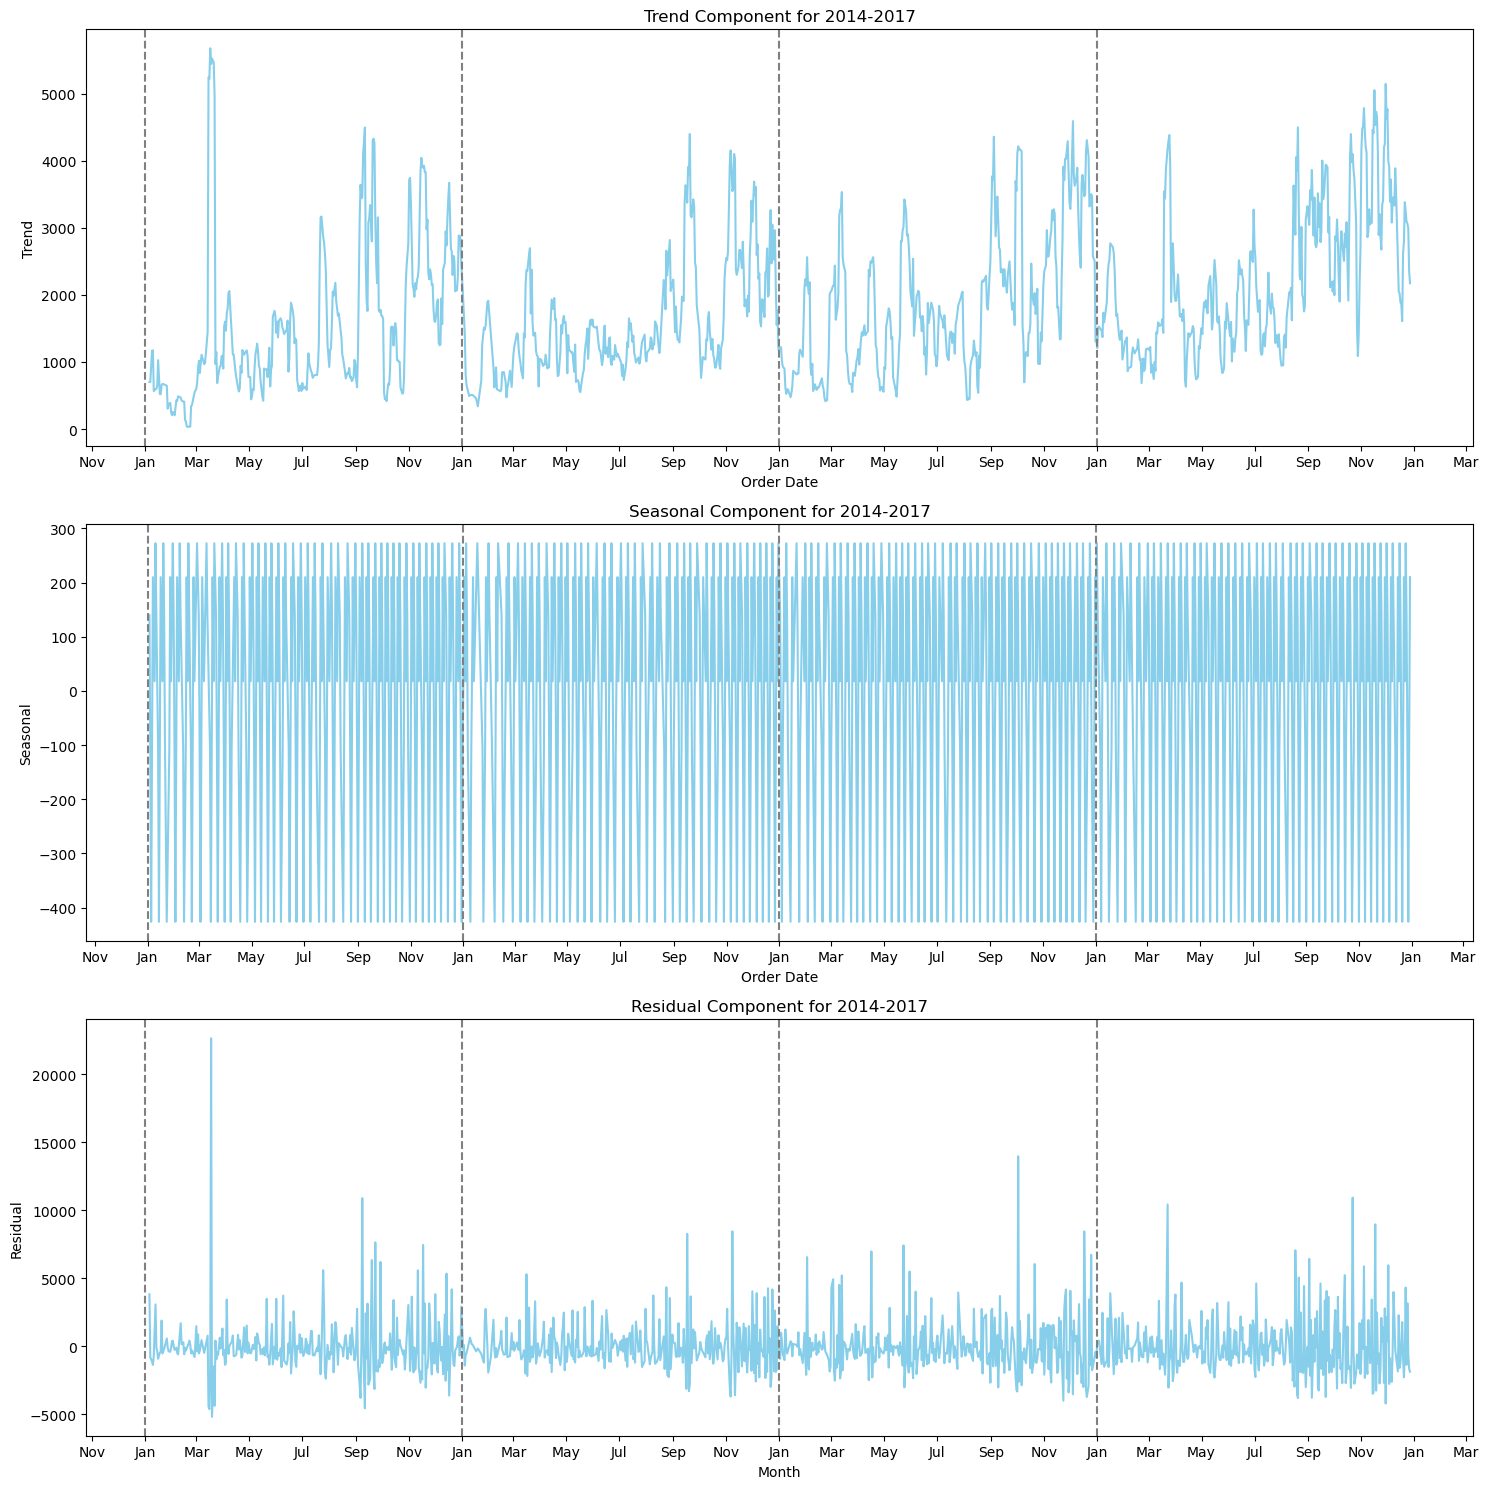

In [16]:
# Setting up the subplots for trend, seasonal, and residual components
fig, axes = plt.subplots(3, 1, figsize=(15, 15), sharex=False)

# Plotting the decomposed components
components = {'Trend': decomposition_all_years.trend, 
              'Seasonal': decomposition_all_years.seasonal, 
              'Residual': decomposition_all_years.resid}

for ax, component in zip(axes, components.items()):
    name, series = component
    sns.lineplot(x=series.index, y=series, color='skyblue', ax=ax)
    ax.set_title(f'{name} Component for 2014-2017')
    ax.set_ylabel(name)
    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1, 13, 2))) # Displaying every other month on x-axis
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Displaying month name

    # Adding vertical dashed lines to separate each year
    for year in range(2014, 2018):
        ax.axvline(pd.Timestamp(f'{year}-01-01'), color='gray', linestyle='--')

plt.xlabel('Month')
plt.tight_layout()

# Save the figure to the specified path
plt.savefig('Time Series Decomposition for 2014 - 2017.png')

plt.show()

***Analysis of Time Series Decomposition for 2014 - 2017***

**Trend Component:**  The trend component shows the underlying long-term pattern in the data. We can see some growth in sales over time, with noticeable fluctuations. There may be underlying factors such as economic conditions, market expansion, or changes in product offerings contributing to this trend.

**Seasonal Component:** The seasonal component still exhibits a weekly pattern, reflecting regular cycles in customer behavior. These patterns might be influenced by shopping habits, promotional cycles, or other recurring factors.

**Residual Component:** Similar to before, we see a few anomolies spaced out.

# Box-Jenkins Models

Box-Jenkins Models, also known as ARIMA models, are a class of statistical techniques used for time series analysis and forecasting. They consist of AutoRegressive (AR), Integrated (I), and Moving Average (MA) components, which capture the past values, differencing, and forecast errors, respectively. These models are prized for their flexibility, interpretability, and accuracy in short-term predictions, making them valuable tools for data scientist dealing with diverse and complex temporal data.

We followed the following steps to assess our models:
1. **Checking Stationarity**

2. **Determining Order of AR and MA Models**

3. **Creating Models and Comparing Models**

## I. Checking Stationarity

**ARIMA** models assume that the data's statistical properties, such as mean and variance, do not change over time. If the data is non-stationary and exhibits trends, seasonality, or other fluctuations, the model's assumptions are violated, leading to inaccurate results. **Stationarity** is also crucial for meaningful autocorrelation analysis, which ARIMA models heavily rely on. **Autocorrelation** measures how a data point relates to its past values. In non-stationary data, the autocorrelation can be misleading, complicating the model's ability to capture underlying patterns. In the case of ARIMA models; the I component of the model refers to differencing; which transforms the data into a stationary form. 

### 1.) Visually 

The plots above provides a visual representation of the "Sales" time series. We can see fluctuations in the data, but its challenging to determine stationarity from the plots alone. However; by decomposing the time series model we can see that their is a cyclical behavior in the data; as seen in the seasonal trend. 

### 2.) Dickey - Fuller Test

The **Dickey-Fuller test** is a statistical test used to determine if a time series is stationary. In our analysis, we used the Augmented Dickey-Fuller (ADF) version of the test, which is suitable for more complex time series.

- **Null Hypothesis (\(H_0\))**: The series has a unit root (is non-stationary).
- **Alternative Hypothesis (\(H_1\))**: The series is stationary.

Mathematically, it tests the following model:

$y_t = \alpha + \beta t + \gamma y_{t-1} + \delta_1 \Delta y_{t-1} + \ldots + \delta_{p-1} \Delta y_{t-p+1} + \varepsilon_t $

where $\Delta y_{t} = y_t - y_{t-1}$.

The test focuses on $\gamma$, with the null hypothesis that $\gamma = 0$ (non-stationary) and the alternative hypothesis that $\gamma < 0\$ (stationary). A p-value < 0.05 indicates that we reject the null hypothesis, suggesting stationarity.

In [17]:
# Setting "Order Date" as the index
data.set_index('Order Date', inplace=True)

# Aggregating Sales by Date
sales_data = data['Sales'].resample('D').sum()

# Displaying the first few rows of the sales time series
sales_data.head()

Order Date
2014-01-03      16.448
2014-01-04     288.060
2014-01-05      19.536
2014-01-06    4407.100
2014-01-07      87.158
Freq: D, Name: Sales, dtype: float64

In [18]:
# Importing the Augmented Dickey-Fuller test function
from statsmodels.tsa.stattools import adfuller

# Performing the Dickey-Fuller test
adf_result = adfuller(sales_data)

# Extracting the p-value
p_value = adf_result[1]

# Printing the result
p_value

2.9148790727674486e-05

The p-value from the Dickey-Fuller test is approximately $2.91×10^{−5}$, which is less than 0.05. **This allows us to reject the null hypothesis, suggesting that the "Sales" time series is stationary.**

Since the data appears to be stationary, we can proceed with determining the order of the AR and MA models using the ACF and PACF plots.

## II. Determine Order of AR and MA Models

To determine the appropriate order for the AR (Autoregressive) and MA (Moving Average) components, we'll analyze the Auto-Correlation Function (ACF) and Partial Auto-Correlation Function (PACF) plots.

### 1.) ACF Plot

The **ACF plot** shows the correlation between the time series and its lagged values. It helps in identifying the order of the MA (Moving Average) component (q). For a MA model; the theoretical ACF of an MA model cuts off after lag q.

<Figure size 1500x800 with 0 Axes>

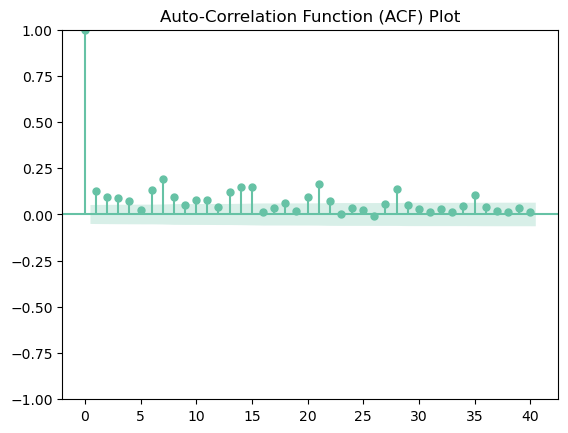

In [19]:
# Importing the ACF and PACF plotting functions
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plotting the ACF
plt.figure(figsize=(15, 8))
plot_acf(sales_data, lags=40)
plt.title('Auto-Correlation Function (ACF) Plot')

# Save the figure to the specified path
plt.savefig('ACF Plot.png')

plt.show()

**ACF Plot:** The ACF plot shows a gradual decrease without a distinct cut-off point. This lack of a clear indication can signify no clear MA component or model complexity that cannot be captured by jusr the MA component. We will explore this further when constructing our models; and explore which performs the best. 

### 2.) PACF Plot

The **PACF plot** shows the partial correlation between the time series and its lagged values, controlling for other lags. It helps in identifying the order of the AR (AutoRegressive) component (p). For an AR model, the theoretical PACF of an AR model cuts off after lag p.

<Figure size 1500x800 with 0 Axes>

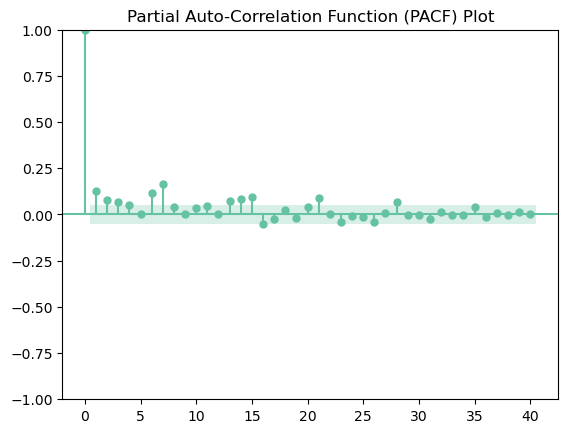

In [20]:
# Plotting the PACF
plt.figure(figsize=(15, 8))
plot_pacf(sales_data, lags=40)
plt.title('Partial Auto-Correlation Function (PACF) Plot')

# Save the figure to the specified path
plt.savefig('PACF Plot.png')

plt.show()

**PACF Plot:** The PACF plot shows a significant spike at lag 1, then a gradual decrease, suggesting that the AR order (p) will have to be tested later on as well.

## III. Creating and Comparing Models

1. **Evaluation Criteria**
2. **AR Model**
3. **MA Models**
4. **ARIMA Models**
5. **SARIMA Models**

### 1.) Evaluation Criteria - AIC vs BIC

- **AIC (Akaike Information Criterion)**: AIC balances goodness of fit with complexity (penalizes overfitting). It is given by $ AIC = 2k - 2\ln(L) $, where $ k $ is the number of parameters and $ L $ is the likelihood.
- **BIC (Bayesian Information Criterion)**: BIC is similar to AIC but has a stronger penalty for model complexity. It is given by $ BIC = k\ln(n) - 2\ln(L) $ where $ n $ is the number of observations.

In practice, both can be used for model selection. AIC tends to favor more complex models, while BIC favors simpler models. In our analysis, we will use both then compare.

### 2.) AR Models
#### Autoregressive Models

AR models explain a time series based on its own past values. The mathematical equation is:

$ X_t = c + \phi_1 X_{t-1} + \phi_2 X_{t-2} + \ldots + \phi_p X_{t-p} + \varepsilon_t $

Here, $ X_t $ is the current value, $ c $ is a constant, $ \phi $ represents the coefficients, $ p $ is the order of the model, and $ \varepsilon_t $ is white noise.

In [21]:
from statsmodels.tsa.arima.model import ARIMA

# Function to test AR models of different orders
def test_ar_models(data, orders=[1, 3, 5]):
    results = []
    for order in orders:
        # Fitting the AR model
        ar_model = ARIMA(data, order=(order, 0, 0))
        ar_fit = ar_model.fit()
        # Storing the AIC and BIC
        results.append((order, ar_fit.aic, ar_fit.bic))
    return results

# Testing AR models on the sales data
ar_results = test_ar_models(sales_data)

ar_results

[(1, 26594.205758160624, 26610.06022089833),
 (3, 26582.544412672796, 26608.96851723564),
 (5, 26583.003065472632, 26619.996811860612)]

### 3.) MA Models 
#### Moving Average Models


MA models represent a time series as a linear combination of past error terms. The mathematical expression is:

$ X_t = \mu + \theta_1 \varepsilon_{t-1} + \theta_2 \varepsilon_{t-2} + \ldots + \theta_q \varepsilon_{t-q} $

Here, $ \mu $ is the mean of the series, $ \theta $ represents the coefficients, $ q $ is the order of the model, and $ \varepsilon $ is the error terms.


In [22]:
# Function to test MA models of different orders
def test_ma_models(data, orders=[1, 2, 3]):
    results = []
    for order in orders:
        # Fitting the MA model
        ma_model = ARIMA(data, order=(0, 0, order))
        ma_fit = ma_model.fit()
        # Storing the AIC and BIC
        results.append((order, ma_fit.aic, ma_fit.bic))
    return results

# Testing MA models on the sales data
ma_results = test_ma_models(sales_data)

ma_results

[(1, 26597.517799252768, 26613.372261990473),
 (2, 26591.53134401755, 26612.670627667823),
 (3, 26586.051797410775, 26612.47590197362)]

### 3.) ARIMA Models 

#### Autoregressive Integrated Moving Average Models

ARIMA combines AR and MA models and includes differencing to achieve stationarity. The mathematical model is expressed as:

$ (1 - \Phi(B) )(1 - B)^d X_t = (1 + \Theta(B)) \varepsilon_t $

Where $ B $ is the backshift operator, $ d $ is the differencing order, $ \Phi(B) $ and $ \Theta(B) $ are the AR and MA polynomials respectively.

#### A.) Models being Tested

- ARIMA(1, 1, 1): A basic model with one order of differencing, one AR term, and one MA term.
- ARIMA(2, 0, 2): Without differencing, includes two AR terms and two MA terms.
- ARIMA(1, 1, 2): One order of differencing, one AR term, and two MA terms.
- ARIMA(2, 1, 1): One order of differencing, two AR terms, and one MA term.
- ARIMA(2, 1, 2): One order of differencing, two AR terms, and two MA terms.
- ARIMA(3, 1, 1): One order of differencing, three AR terms, and one MA term.
- ARIMA(1, 1, 3): One order of differencing, one AR term, and three MA terms.
- ARIMA(3, 1, 2): One order of differencing, three AR terms, and two MA terms.

#### B.) Reasoning

- Models with Differencing (d=1) are chosen to account for any potential non-stationarity that might be missed during the initial tests. Differencing helps in making the series stationary by removing trends.
- AR Terms (p) represent the influence of previous observations on the current observation. Variations in p allow us to capture different temporal dependencies.
- MA Terms (q) represent the influence of previous forecast errors on the current observation. Variations in q allow us to model different error structures.

In [23]:
import warnings
warnings.filterwarnings('ignore')

# Defining the orders for ARIMA models
arima_orders = [
    (1, 1, 1),
    (2, 0, 2),
    (1, 1, 2),
    (2, 1, 1),
    (2, 1, 2),
    (3, 1, 1),
    (1, 1, 3),
    (3, 1, 2),
]

# Function to test ARIMA models of different orders
def test_arima_models(data, orders):
    results = []
    for order in orders:
        # Fitting the ARIMA model
        arima_model = ARIMA(data, order=order)
        arima_fit = arima_model.fit()
        # Storing the AIC and BIC
        results.append((order, arima_fit.aic, arima_fit.bic))
    return results

# Testing ARIMA models on the sales data using the previously defined function
arima_results = test_arima_models(sales_data, arima_orders)

arima_results

[((1, 1, 1), 26521.269577209903, 26537.12198162849),
 ((2, 0, 2), 26536.866074896316, 26568.575000371726),
 ((1, 1, 2), 26519.90737573874, 26541.043914963524),
 ((2, 1, 1), 26523.19346322155, 26544.33000244633),
 ((2, 1, 2), 26527.415532257524, 26553.8362062885),
 ((3, 1, 1), 26525.189824877754, 26551.61049890873),
 ((1, 1, 3), 26528.573898673552, 26554.994572704527),
 ((3, 1, 2), 26529.400341460845, 26561.105150298015)]

#### C.) Comparing the AR, MA and ARIMA models:

In [24]:
# Converting AR and MA results to the required format
ar_results_formatted = [(f"AR({order})", aic, bic) for order, aic, bic in ar_results]
ma_results_formatted = [(f"MA({order})", aic, bic) for order, aic, bic in ma_results]
arima_results_formatted = [(f"ARIMA{order}", aic, bic) for order, aic, bic in arima_results]

# Combining the results of AR, MA, and ARIMA models
combined_results = ar_results_formatted + ma_results_formatted + arima_results_formatted

# Creating a DataFrame to store the results
results_df = pd.DataFrame(combined_results, columns=['Model', 'AIC', 'BIC'])

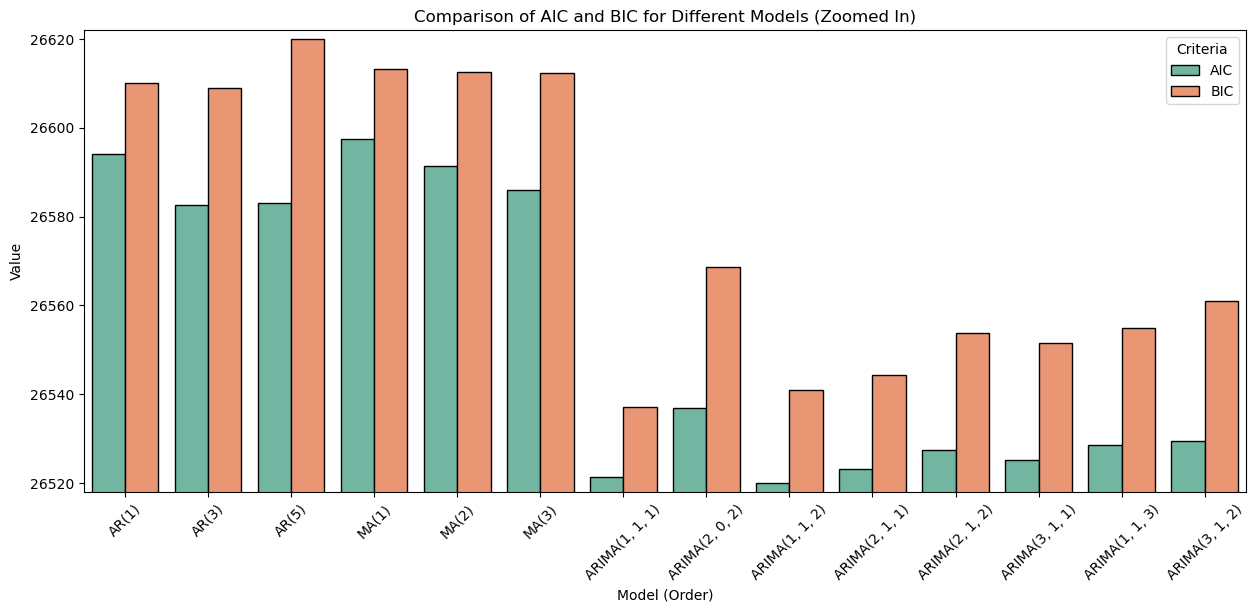

In [25]:
# Melting the DataFrame to have AIC and BIC in separate rows
melted_results = results_df.melt(id_vars=['Model'], value_vars=['AIC', 'BIC'], var_name='Criteria', value_name='Value')

# Finding the minimum value of AIC and BIC to set the y-axis limit
min_value = melted_results['Value'].min()
max_value = melted_results['Value'].max()
zoom_factor = 0.02  # Proportion to zoom in on the top
y_lower_limit = min_value - (max_value - min_value) * zoom_factor
y_upper_limit = max_value + (max_value - min_value) * zoom_factor

# Plotting the bar plot with adjusted y-axis limits
plt.figure(figsize=(15, 6))
sns.barplot(x='Model', y='Value', hue='Criteria', data=melted_results, ci=None, palette="Set2", edgecolor="k", linewidth=1)
plt.title('Comparison of AIC and BIC for Different Models (Zoomed In)')
plt.xlabel('Model (Order)')
plt.ylabel('Value')
plt.ylim(y_lower_limit, y_upper_limit)  # Setting y-axis limits
plt.xticks(rotation=45)

# Save the figure to the specified path
plt.savefig('Comparing the AR, MA and ARIMA models.png')

plt.show()

***Analysis of AR and MA models***
- AR and MA models do not include differencing. Even if the series appears stationary, subtle non-stationary patterns might be captured better with differencing which may explain the poor performance compared to the ARIMA models. 

***Analysis of ARIMA models***
- Models with Differencing (d=1) generally performed better. This suggests that even though the series was found to be stationary, differencing helped in modeling some hidden non-stationarity.
- The ARIMA(1, 1, 2) model performed the best in terms of AIC, followed closely by the ARIMA(1, 1, 1) model.
- Models with Higher Orders (p=3, q=3) did not necessarily perform better. This indicates that adding complexity does not always lead to better fitting models

### 4.) SARIMA Models 
#### Seasonal Autoregressive Integrated Moving Average Models


SARIMA (Seasonal ARIMA) models are extensions of ARIMA models that explicitly account for seasonality in the data. They are defined by four additional parameters: seasonal order (P, D, Q, s), where:

- **P**: Seasonal autoregressive order
- **D**: Seasonal differencing
- **Q**: Seasonal moving average order
- **s**: Number of observations per seasonal cycle (e.g., 12 for monthly data with yearly seasonality)

It can be mathematically represented as:

$ (1 - \Phi(B^S) )(1 - B^S)^D (1 - \Phi(B))(1 - B)^d X_t = (1 + \Theta(B^S))(1 + \Theta(B)) \varepsilon_t $

Where $ S $ is the seasonal frequency, $ D $ is the seasonal differencing order, and the other terms are as defined in ARIMA. The seasonal components allow the model to account for seasonal patterns in the data.

#### A.) Models being Tested and Reasoning 

- **SARIMA(1, 1, 1, 0, 1, 1, 7)**: Weekly seasonality with simple seasonal AR and MA terms.
- **SARIMA(2, 0, 2, 1, 1, 1, 12)**: Monthly seasonality with more complex non-seasonal components.
- **SARIMA(0, 1, 1, 1, 1, 1, 4)**: Quarterly seasonality with a simple non-seasonal MA term.

In [26]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Function to test SARIMA models of different orders
def test_sarima_models(data, orders):
    results = []
    for order, seasonal_order in orders:
        # Fitting the SARIMA model
        sarima_model = SARIMAX(data, order=order, seasonal_order=seasonal_order)
        sarima_fit = sarima_model.fit(disp=False)
        # Storing the AIC and BIC
        results.append((order, seasonal_order, sarima_fit.aic, sarima_fit.bic))
    return results

# Defining the orders for SARIMA models
sarima_orders = [
    ((1, 1, 1), (0, 1, 1, 7)),  # Weekly seasonality
    ((2, 0, 2), (1, 1, 1, 12)), # Monthly seasonality
    ((0, 1, 1), (1, 1, 1, 4)),  # Quarterly seasonality
]

# Testing SARIMA models on the sales data
sarima_results = test_sarima_models(sales_data, sarima_orders)

sarima_results

[((1, 1, 1), (0, 1, 1, 7), 26316.341673192757, 26337.458948534415),
 ((2, 0, 2), (1, 1, 1, 12), 26536.346404882803, 26573.282299701834),
 ((0, 1, 1), (1, 1, 1, 4), 26477.099293187355, 26498.224835841636)]

#### B.) Comparing the SARIMA and ARIMA models

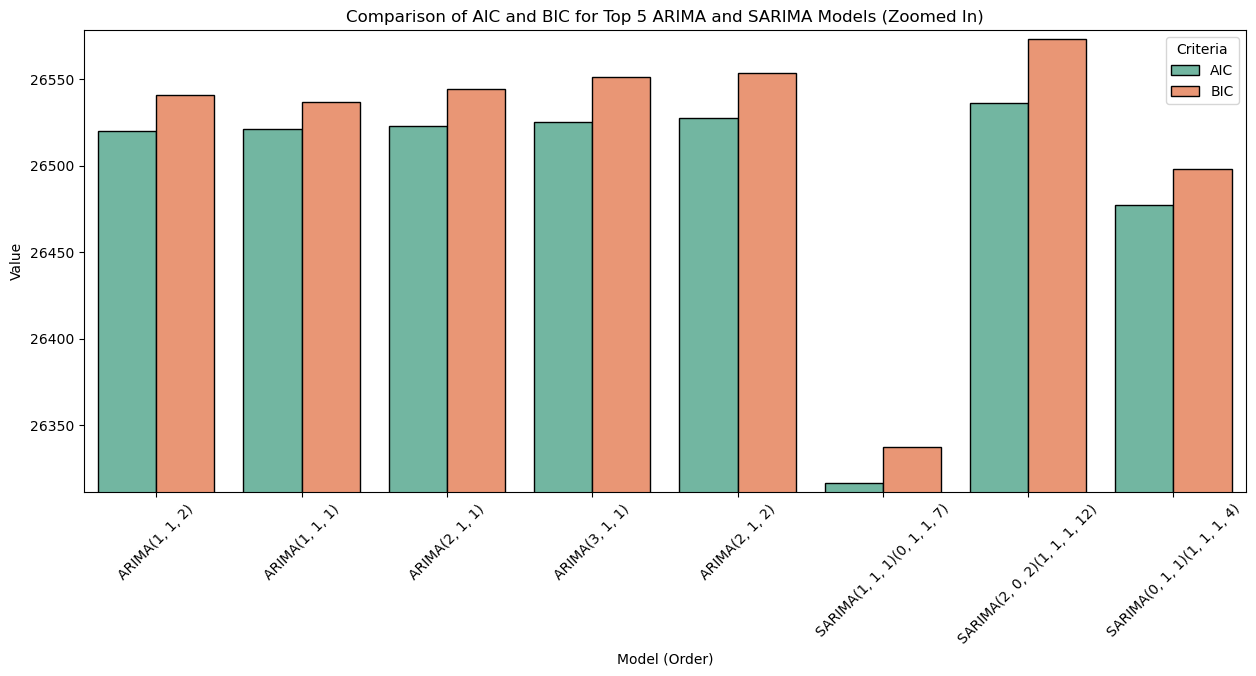

In [27]:
# Selecting the top 5 ARIMA models based on AIC
top_5_arima_results = sorted(arima_results, key=lambda x: x[1])[:5]

# Converting SARIMA results to the required format
sarima_results_formatted = [(f"SARIMA{order}{seasonal_order}", aic, bic) for order, seasonal_order, aic, bic in sarima_results]

# Combining the results of top 5 ARIMA and SARIMA models
combined_top_results = [(f"ARIMA{order}", aic, bic) for order, aic, bic in top_5_arima_results] + sarima_results_formatted

# Creating a DataFrame to store the results
top_results_df = pd.DataFrame(combined_top_results, columns=['Model', 'AIC', 'BIC'])

# Melting the DataFrame to have AIC and BIC in separate rows
melted_top_results = top_results_df.melt(id_vars=['Model'], value_vars=['AIC', 'BIC'], var_name='Criteria', value_name='Value')

# Finding the minimum value of AIC and BIC to set the y-axis limit
min_value_top = melted_top_results['Value'].min()
max_value_top = melted_top_results['Value'].max()
zoom_factor_top = 0.02  # Proportion to zoom in on the top
y_lower_limit_top = min_value_top - (max_value_top - min_value_top) * zoom_factor_top
y_upper_limit_top = max_value_top + (max_value_top - min_value_top) * zoom_factor_top

# Plotting the bar plot with adjusted y-axis limits
plt.figure(figsize=(15, 6))
sns.barplot(x='Model', y='Value', hue='Criteria', data=melted_top_results, ci=None, palette="Set2", edgecolor="k", linewidth=1)
plt.title('Comparison of AIC and BIC for Top 5 ARIMA and SARIMA Models (Zoomed In)')
plt.xlabel('Model (Order)')
plt.ylabel('Value')
plt.ylim(y_lower_limit_top, y_upper_limit_top)  # Setting y-axis limits
plt.xticks(rotation=45)

# Save the figure to the specified path
plt.savefig('Comparing the SARIMA and ARIMA models.png')

plt.show()

***Analysis of SARIMA and ARIMA models***

- The SARIMA(1, 1, 1)(0, 1, 1, 7) model, designed to capture weekly seasonality, has the lowest AIC and BIC, indicating a better fit compared to the other two models. This is reasonable since the model did have a weekly cyclical pattern; as indicated in the Time Series Decomposition.
- ARIMA models do not account for seasonality; therefore although they performed better than AR and MA models they did not perform better than SARIMA weekly model. However; the SARIMA models accounting for monthly and quarterly trend did not outperform the top 5 performing ARIMA models.
- **Further Investigation -** In the future we can explore other SARIMA weekly seasonality models to determine if we can make further improvements to this model. 

# Model Evaluation

## I.) Residual Analysis

Residuals are the differences between the observed values and the values predicted by the model. Residual analysis plays a crucial role as it helps us evaluate the quality of our model's fit to the data and identify potential issues or patterns that might have been missed during the modeling process. We will conduct 2 tests: Normality Test Using QQ Plot, Normality Test Using Shapiro-Wilk Test and Autocorrelation Test Using Ljung-Box Test

In this case we are using the SARIMA model with a weekly pattern, specifically SARIMA(1, 1, 1)(0, 1, 1, 7), since it showed the best fit according to the AIC and BIC criteria.

In [28]:
from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.diagnostic import acorr_ljungbox

# Fitting the selected SARIMA model
sarima_order = (1, 1, 1)
seasonal_order = (0, 1, 1, 7)
sarima_model = SARIMAX(sales_data, order=sarima_order, seasonal_order=seasonal_order)
sarima_fit = sarima_model.fit(disp=False)
# Extracting the residuals
residuals = sarima_fit.resid

### 1.) Normality Test Using QQ Plot

QQ plot (Quantile-Quantile plot) is a graphical tool used to assess whether a dataset follows a specific theoretical distribution, such as the normal distribution. In the context of time series analysis, it helps us check if the residuals of our model are normally distributed. If the points on the QQ plot roughly follow a straight line, it suggests that the residuals are approximately normally distributed. 

In [29]:
from statsmodels.graphics.gofplots import qqplot

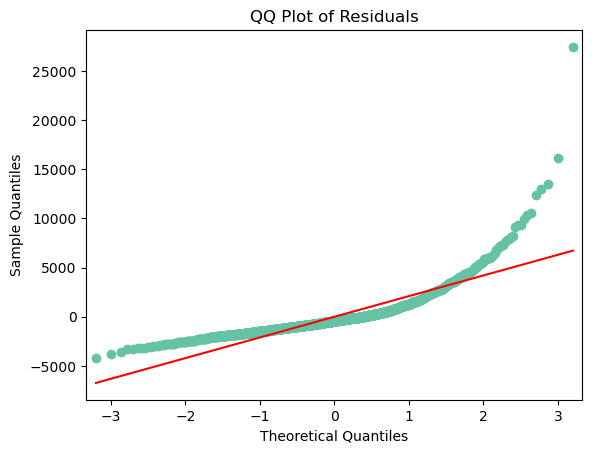

In [30]:
# Normality test using QQ plot
qqplot(residuals, line='s')
plt.title('QQ Plot of Residuals')

# Save the figure to the specified path
plt.savefig('Normality Test Using QQ Plot.png')

plt.show()

***Analysis of Normality Test Using QQ Plot***
-  The x-axis represents the theoretical quantiles of a standard normal distribution. On the y-axis we can see the actual residuals from the model.
- The actual residuals follow the 45-degree line up to 2 (second quartile). This suggests that the residuals mostly follow a normal distribution in the central part.
- However, it is dispersed after 2. There are several severe outliers at 3 and afterwards. The dispersion and outlier indicate that the residuals have heavier tails than a normal distribution, showing some deviation from normality.

### 2.) Normality Test Using Shapiro-Wilk Test

The Shapiro-Wilk test is a statistical test that quantifies the departure of a dataset from a normal distribution. The null hypothesis of the test is that the data are normally distributed. If the p-value obtained from the test is below a certain significance level (e.g., 0.05), we reject the null hypothesis and conclude that the residuals do not follow a normal distribution.

In [31]:
# Normality test using Shapiro-Wilk test
shapiro_test_stat, shapiro_p_value = shapiro(residuals)
print("Shapiro-Wilk Test Statistic:", shapiro_test_stat, "P-value:", shapiro_p_value)

Shapiro-Wilk Test Statistic: 0.7574242949485779 P-value: 6.925217010693246e-42


***Analysis of Normality Test Using Shapiro-Wilk Test***
- **The low p-value indicates a rejection of the null hypothesis that the residuals are normally distributed.** This aligns with the results we found above using the QQ-Plot. 

### 3.) Autocorrelation Test Using Ljung-Box Test

The Ljung-Box test is used to assess the presence of autocorrelation in a time series dataset. The Ljung-Box test is applied to the residuals to check for residual autocorrelation. The test statistic compares the autocorrelations of the residuals at different lags to the expected values under the assumption of no autocorrelation. If the test statistic is significantly different from what would be expected under the null hypothesis, it may indicate the presence of autocorrelation in the residuals.

The **lag value** is chosen based on the frequency of the time series data. In this case, the lag value was chosen to be 7 since the time series data exhibits clear weekly seasonal patterns. 

In [32]:
# Autocorrelation test using Ljung-Box test
ljung_box_result = acorr_ljungbox(residuals, lags=[7])
print(ljung_box_result)

    lb_stat  lb_pvalue
7  6.455147   0.487718


- **Since the p-value is greater than 0.05, we fail to reject the null hypothesis that the residuals are independently distributed.** This means that there is no evidence of autocorrelation in the residuals at lag 7, which is a good indication that the model has captured the underlying patterns in the data well.
- This indicated that the residuals are behaving like white noise, and that the model has accounted for the underlying autocorrelation structure.

## II.) Model Forecasting with Non-Normality

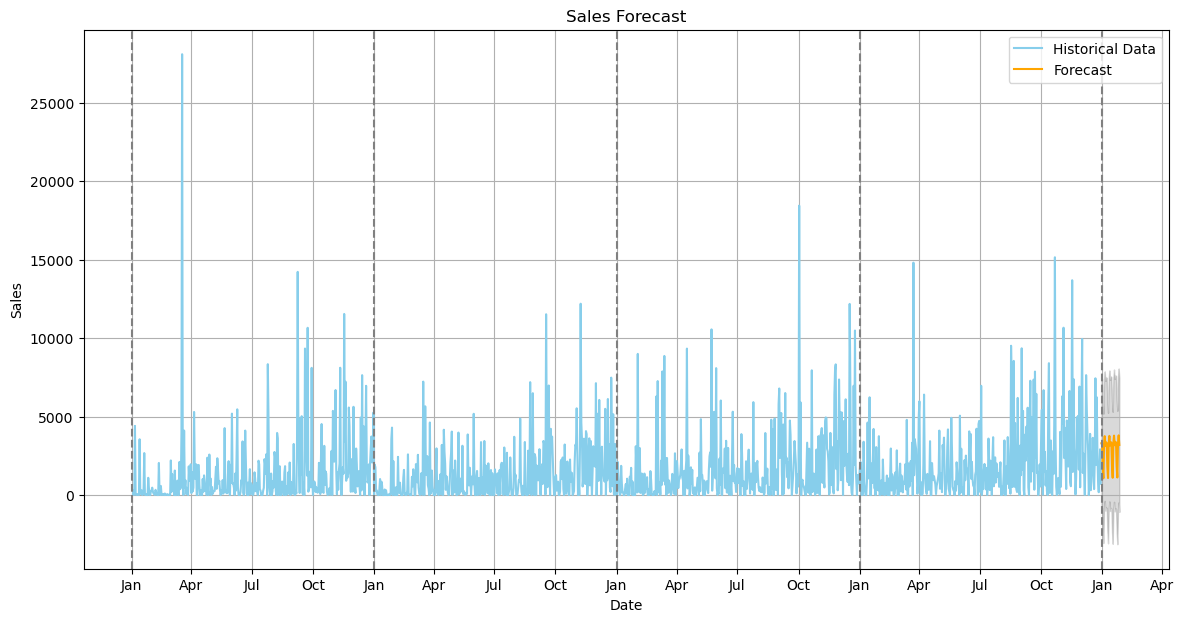

In [33]:
# Forecasting future values (e.g., 28 periods ahead)
forecast_periods = 28
forecast_results = sarima_fit.get_forecast(steps=forecast_periods)
forecast_values = forecast_results.predicted_mean
confidence_intervals = forecast_results.conf_int()

# Getting the index for the forecast 
forecast_index = sales_data.index[-1] + pd.DateOffset(1)
forecast_index = pd.date_range(forecast_index, periods=forecast_periods, freq='D') 

# Plotting the forecast
plt.figure(figsize=(14, 7))
plt.plot(sales_data, label='Historical Data', color='skyblue')
plt.plot(forecast_index, forecast_values, label='Forecast', color='orange')
plt.fill_between(forecast_index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='k', alpha=.15)

# Setting the x-axis to display every third month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1, 13, 3)))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Adding vertical dashed lines to separate each year
for year in range(sales_data.index.year.min(), forecast_index.year.max() + 1):
    plt.axvline(pd.Timestamp(f'{year}-01-01'), color='gray', linestyle='--')

plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)

# Save the figure to the specified path
plt.savefig('Model Forecasting with Non-Normality.png')

plt.show()

# Improving Model Performance - Addressing Non-Normality

Non-normality in the residuals may indicate that some underlying patterns in the data have not been adequately captured by the model. 

## I. Log Transformations

A log transformation is commonly used to stabilize variance and make a dataset more closely approximate normality. The transformation $log(1 + x)$ is a variation of the log transformation that can handle zero values. By adding 1 to each value before taking the logarithm, you avoid the issue of taking the log of zero, which is undefined.

### 1.) Applying Log Transformations

In [34]:
# Apply log transformation to the sales data
log_sales_data = np.log1p(sales_data) # Using log(1 + x) to handle zero values

### 2.) Evaluating Log Transformations

In [35]:
# Fitting the selected SARIMA model to the log-transformed data
sarima_order = (1, 1, 1)
seasonal_order = (0, 1, 1, 7)
sarima_model_log = SARIMAX(log_sales_data, order=sarima_order, seasonal_order=seasonal_order)
sarima_fit_log = sarima_model_log.fit(disp=False)

# Extracting the residuals
residuals_log = sarima_fit_log.resid

# Normality test using Shapiro-Wilk test on the log-transformed residuals
shapiro_test_stat_log, shapiro_p_value_log = shapiro(residuals_log)
print("Shapiro-Wilk Test Statistic:", shapiro_test_stat_log, "P-value:", shapiro_p_value_log)
sarima_fit_log.aic, sarima_fit_log.bic, 

Shapiro-Wilk Test Statistic: 0.9751886129379272 P-value: 3.696146002923808e-15


(6440.280648397795, 6461.397923739453)

***Analysis of Applying Log Transformation***
- **The low p-value indicates a rejection of the null hypothesis that the residuals are normally distributed.** The Normality test using Shapiro-Wilk test on the log-transformed residuals performed better than the previous model (relatively); however it still failed. Therefore further improvements should be made.
- **Model Performance** - Model performed significantly better than previous SARIMA models. Will explore this further when comparing new SARIMA models.

## II. Handling Outliers
Identifying and treating outliers can reduce the heavy tails in the residuals. As mentioned previously; the QQ plot showed that the deviations occur at higher theoretical quantiles (e.g., 3) and reach values around 25000. However there was also deviation at the lower theoretical quantiles as well. To address this issue we will inspect the outliers after applying log transformation to the dataset:

### 1.) Identifying Outliers

In [36]:
from scipy.stats import zscore

# Calculate the Z-scores for the log-transformed sales data
z_scores = zscore(log_sales_data)

# Threshold for identifying outliers
threshold = 2

# Identify outliers (both upper and lower)
outliers = np.abs(z_scores) > threshold

# Extract the dates and values of the outliers
outlier_dates = log_sales_data.index[outliers]
outlier_values = log_sales_data[outliers]

# Combine dates and values for analysis
outlier_info = list(zip(outlier_dates, outlier_values))

# Print the number of outliers and a sample of the outliers
num_outliers = sum(outliers)
outlier_sample = outlier_info[:5] if num_outliers > 5 else outlier_info
print("Number of Outliers:", num_outliers)
print("Sample of Outliers:", outlier_sample)

Number of Outliers: 221
Sample of Outliers: [(Timestamp('2014-01-08 00:00:00'), 0.0), (Timestamp('2014-01-12 00:00:00'), 0.0), (Timestamp('2014-01-17 00:00:00'), 0.0), (Timestamp('2014-01-22 00:00:00'), 0.0), (Timestamp('2014-01-24 00:00:00'), 0.0)]


### 2.) Plotting Outliers

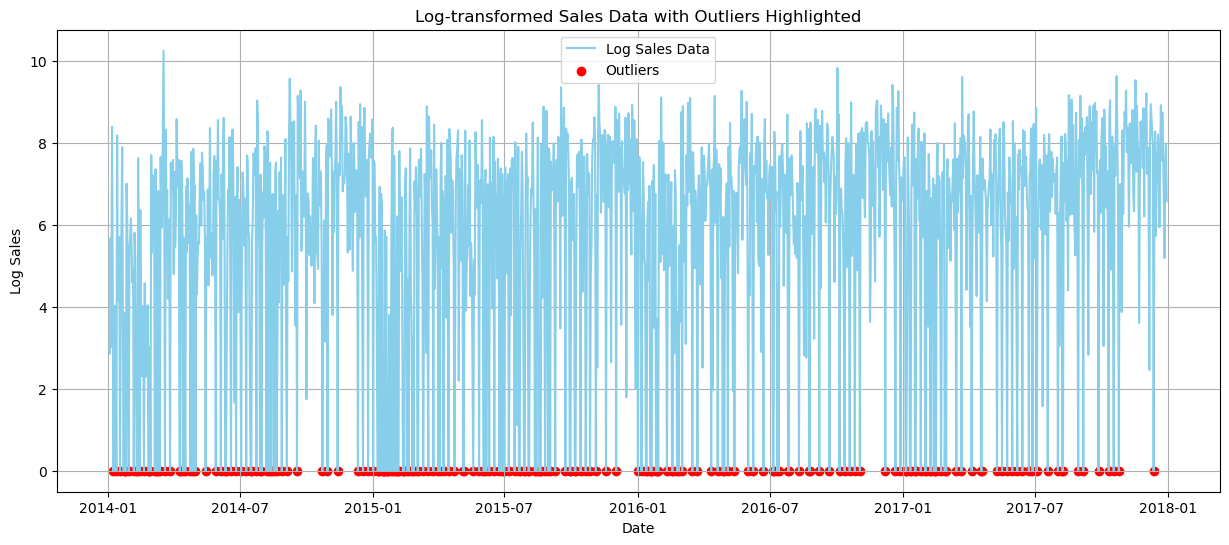

In [37]:
import matplotlib.pyplot as plt

# Plot the log-transformed sales data
plt.figure(figsize=[15, 6])
plt.plot(log_sales_data, label='Log Sales Data', color='skyblue')

# Highlight the outliers
plt.scatter(outlier_dates, outlier_values, color='red', label='Outliers')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Log Sales')
plt.title('Log-transformed Sales Data with Outliers Highlighted')
plt.legend()
plt.grid(True)

# Save the figure to the specified path
plt.savefig('Plotting Outliers.png')

plt.show()

***Analysis of Outliers***
- The random sampling of outlers; as well as the Log-Transformed Sales Data plot above indicate that all the outliers occur at 0. The extreme outliers that were present at the extremes ar no longer present after applying the log transformation on the data.

### 3.) Replacing Outliers with Adjacent Averages / Weekly Averages
This strategy involves identifying outliers and replacing then with the adjacent averages. In the case of missing adjacent data; the data is replaced with the weekly average instead. This can be effective for preserving data and allowing the model to perform better. 

In [38]:
# Create a copy of the log-transformed sales data
log_sales_data_replaced = log_sales_data.copy()

# Iterate through the identified outliers
for date, value in outlier_info:
    # Get the previous and next dates
    prev_date = date - pd.Timedelta(days=1)
    next_date = date + pd.Timedelta(days=1)

    # Check if the previous and next dates exist and are not outliers
    if prev_date in log_sales_data_replaced.index and next_date in log_sales_data_replaced.index \
            and (prev_date, log_sales_data_replaced[prev_date]) not in outlier_info \
            and (next_date, log_sales_data_replaced[next_date]) not in outlier_info:
        # Replace with the average of the previous and next dates
        log_sales_data_replaced[date] = (log_sales_data_replaced[prev_date] + log_sales_data_replaced[next_date]) / 2
    else:
        # Replace with the average of that week
        week_avg = log_sales_data_replaced[date - pd.Timedelta(days=6):date + pd.Timedelta(days=6)].mean()
        log_sales_data_replaced[date] = week_avg

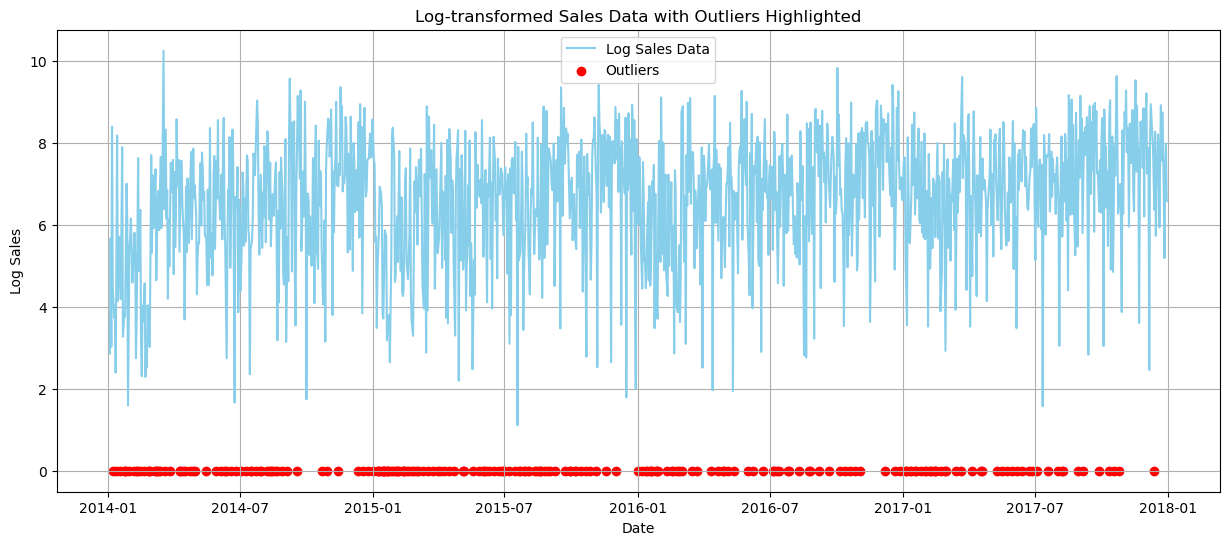

In [39]:
# Plot the log-transformed sales data with replaced outliers
plt.figure(figsize=[15, 6])
plt.plot(log_sales_data_replaced, label='Log Sales Data', color='skyblue')

# Highlight the original outliers
plt.scatter(outlier_dates, outlier_values, color='red', label='Outliers')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Log Sales')
plt.title('Log-transformed Sales Data with Outliers Highlighted')
plt.legend()
plt.grid(True)

# Save the figure to the specified path
plt.savefig('log-transformed sales data.png')

plt.show()

### 4.) Evaluating Replacing Outliers with Adjacent Averages / Weekly Averages

In [40]:
# Fitting the selected SARIMA model to the log-transformed data
sarima_model_log2 = SARIMAX(log_sales_data_replaced, order=sarima_order, seasonal_order=seasonal_order)
sarima_fit_log2 = sarima_model_log.fit(disp=False)

# Extracting the residuals
residuals_log2 = sarima_fit_log2.resid

# Normality test using Shapiro-Wilk test on the log-transformed residuals
shapiro_test_stat_log2, shapiro_p_value_log2 = shapiro(residuals_log2)
print("Shapiro-Wilk Test Statistic:", shapiro_test_stat_log2, "P-value:", shapiro_p_value_log2)
sarima_fit_log2.aic, sarima_fit_log2.bic, 

Shapiro-Wilk Test Statistic: 0.9751886129379272 P-value: 3.696146002923808e-15


(6440.280648397795, 6461.397923739453)

- **The low p-value indicates a rejection of the null hypothesis that the residuals are normally distributed.** The Normality test using Shapiro-Wilk test on the log-transformed residuals performed identically as before.
- The test statistic is close to 1, which would usually indicate that the distribution is close to normal. However, the extremely small p-value is evidence against the null hypothesis that the data follows a normal distribution. To further evaluate we will conduct a Normality Test Using QQ Plot below:
- **Model Performance** - Model performed significantly better than previous SARIMA models. However perfomed identical to previous Log Transformation model indicating that the performance of the model was not compromised by replacing outliers with adjacent Averages and Weekly Averages. 

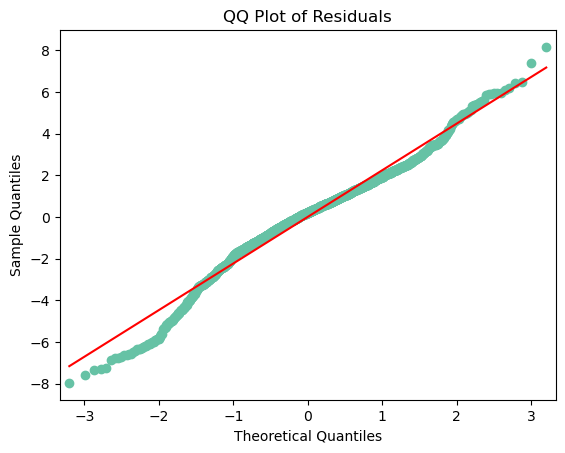

In [41]:
# Normality test using QQ plot
qqplot(residuals_log2, line='s')
plt.title('QQ Plot of Residuals')

# Save the figure to the specified path
plt.savefig('QQ Plot of Residuals - 2.png')

plt.show()

- Here we can see that the log transformation helped stabilize the variance across time, making the data more suitable for modeling.
- By averaging out the Outliers it helped make the data more normally distributed and reduce any abrupt changes in the series, which could improve the fit of time series models.

## III. Model Re-Specification

1. **Model 1: SARIMA(1, 0, 1)(1, 1, 1, 7)** - This model includes both AR and MA terms with a seasonal differencing order of 1 and a seasonal period of 7, reflecting the weekly cycle. The presence of both AR and MA terms allows the model to capture complex autocorrelation patterns.

2. **Model 2: SARIMA(0, 1, 0)(1, 1, 2, 7)** - This model uses only seasonal AR and MA terms with a non-seasonal differencing order of 1. The absence of non-seasonal AR and MA terms might allow the model to focus on the weekly seasonal patterns.

3. **Model 3: SARIMA(2, 0, 2)(2, 1, 1, 7)** - This model has higher-order non-seasonal and seasonal AR and MA terms, allowing for a more flexible fit to the data. The seasonal differencing order and period remain consistent with the weekly cycle.

### 1.) Creating New SARIMA Models

In [42]:
# Creating a list to store SARIMA results
new_sarima_results = []

# List of new SARIMA orders
new_sarima_orders = [
    ((1, 0, 1), (1, 1, 1, 7)),
    ((0, 1, 0), (1, 1, 2, 7)),
    ((2, 0, 2), (2, 1, 1, 7))
]

# Fitting the new SARIMA models
for order, seasonal_order in new_sarima_orders:
    sarima_model_new = SARIMAX(log_sales_data_replaced, order=order, seasonal_order=seasonal_order)
    sarima_fit_new = sarima_model_new.fit(disp=False)
    aic_new = sarima_fit_new.aic
    bic_new = sarima_fit_new.bic
    new_sarima_results.append((f"SARIMA{order}{seasonal_order}", aic_new, bic_new))

### 2.) Comparing New SARIMA Models with Previous Models

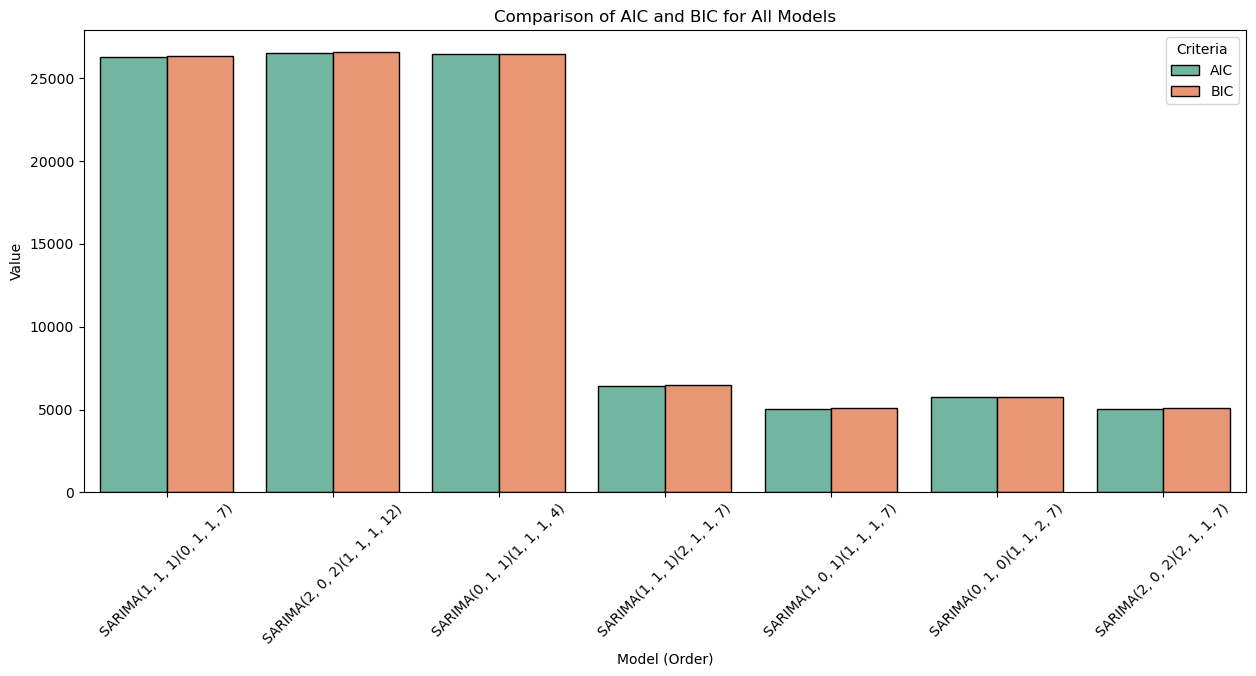

In [43]:
second_model_result = [(f"SARIMA{sarima_order}{seasonal_order}", sarima_fit_log2.aic, sarima_fit_log2.bic)]

# Combining all the results
all_results = sarima_results_formatted + second_model_result + new_sarima_results

# Creating a DataFrame to store the results
all_results_df = pd.DataFrame(all_results, columns=['Model', 'AIC', 'BIC'])

# Melting the DataFrame to have AIC and BIC in separate rows
melted_all_results = all_results_df.melt(id_vars=['Model'], value_vars=['AIC', 'BIC'], var_name='Criteria', value_name='Value')

# Plotting the bar plot
plt.figure(figsize=(15, 6))
sns.barplot(x='Model', y='Value', hue='Criteria', data=melted_all_results, ci=None, palette="Set2", edgecolor="k", linewidth=1)
plt.title('Comparison of AIC and BIC for All Models')
plt.xlabel('Model (Order)')
plt.ylabel('Value')
plt.xticks(rotation=45)

# Save the figure to the specified path
plt.savefig('Comparing New SARIMA Models with Previous Models.png')

plt.show()


***Analysis of New SARIMA Models with Previous Models***
- The three on the right were the SARIMA models created orignally. In the previous graph we had zoomed in to compare these three models; however compared to the other four models present these three significantly under perform.
- The one in the middle is the best performing SARIMA model (which took into account weekly cyclical pattern); and had the Log Transformation applied. As mentioned previously; the log transformation created significant improvement to model performance.
- The three on the right assess different parameter for weekly cyclical SARIMA models.
- In order to clearly visualize all three different types of models the plots below seperate them accordingly

<Figure size 2000x600 with 0 Axes>

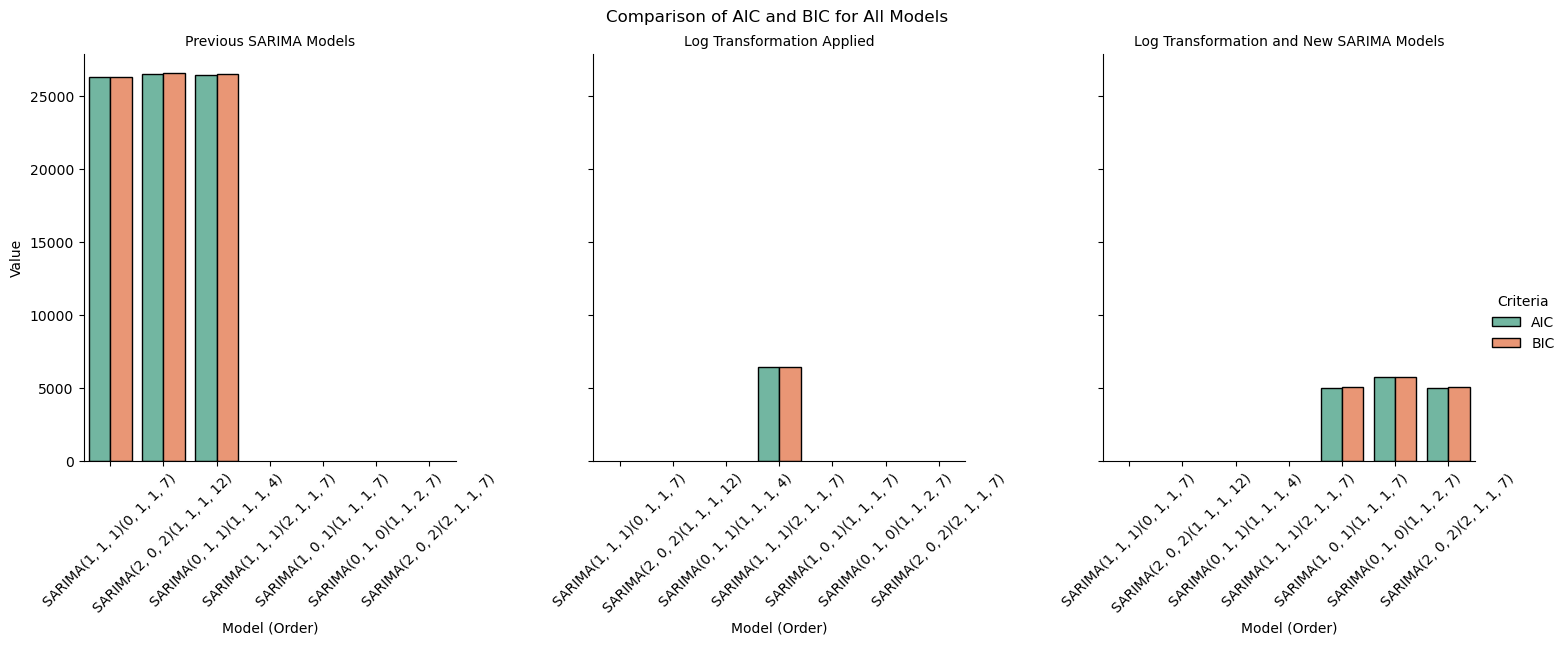

In [44]:
# Adding a category column to identify the types of models
all_results_df['Category'] = ['Previous SARIMA Models' if model in sarima_results_formatted else 'Log Transformation and New SARIMA Models' if model in new_sarima_results else 'Log Transformation Applied' for model in all_results]

# Melting the DataFrame to have AIC and BIC in separate rows
melted_all_results = all_results_df.melt(id_vars=['Model', 'Category'], value_vars=['AIC', 'BIC'], var_name='Criteria', value_name='Value')

# Plotting the bar plot with hue nested inside the Category column
plt.figure(figsize=(20, 6))
g = sns.catplot(x='Model', y='Value', hue='Criteria', col='Category', data=melted_all_results, kind='bar', ci=None, palette="Set2", edgecolor="k", linewidth=1)
g.set_axis_labels('Model (Order)', 'Value')
g.set_xticklabels(rotation=45)
g.set_titles('{col_name}')
plt.suptitle('Comparison of AIC and BIC for All Models', y=1.02)

# Save the figure to the specified path
plt.savefig('Comparing New SARIMA Models with Previous Models - 2.png')

plt.show()

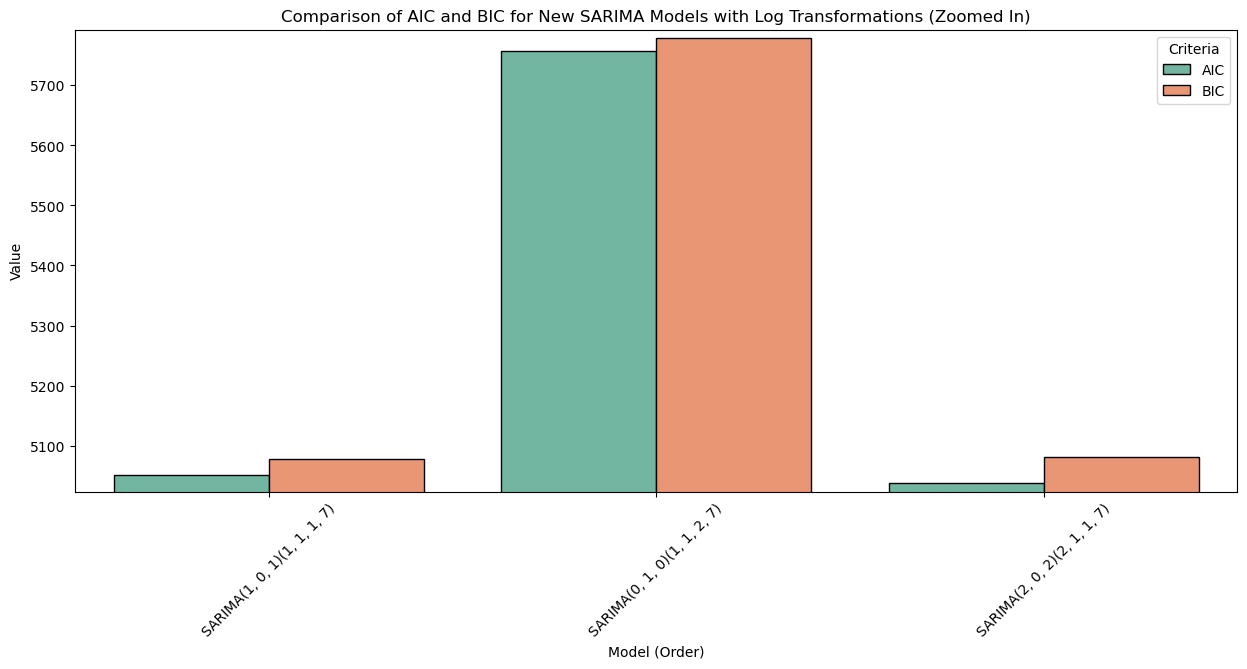

In [45]:
# Filtering the melted DataFrame to include only the new SARIMA models with log transformations
new_log_sarima_results_only = melted_all_results[melted_all_results['Category'] == 'Log Transformation and New SARIMA Models']

# Finding the minimum and maximum values of AIC and BIC to set the y-axis limits
min_value_new_log = new_log_sarima_results_only['Value'].min()
max_value_new_log = new_log_sarima_results_only['Value'].max()
zoom_factor_new_log = 0.02  # Proportion to zoom in
y_lower_limit_new_log = min_value_new_log - (max_value_new_log - min_value_new_log) * zoom_factor_new_log
y_upper_limit_new_log = max_value_new_log + (max_value_new_log - min_value_new_log) * zoom_factor_new_log

# Plotting the bar plot with adjusted y-axis limits
plt.figure(figsize=(15, 6))
sns.barplot(x='Model', y='Value', hue='Criteria', data=new_log_sarima_results_only, ci=None, palette="Set2", edgecolor="k", linewidth=1)
plt.title('Comparison of AIC and BIC for New SARIMA Models with Log Transformations (Zoomed In)')
plt.xlabel('Model (Order)')
plt.ylabel('Value')
plt.ylim(y_lower_limit_new_log, y_upper_limit_new_log)  # Setting y-axis limits
plt.xticks(rotation=45)
plt.show()


***Analysis of New SARIMA Models***
- Model 1 and Model 3 performed significantly better than Model 2.
- The absence of non-seasonal AR and MA terms in Model 2 led to its underperformance, as it could not capture some underlying patterns.
- Model 1 and Model 3's inclusion of both AR and MA terms with seasonal differencing allowed them to capture more complexities.

### 3. Model Forecasting

Forecasting using the final model:

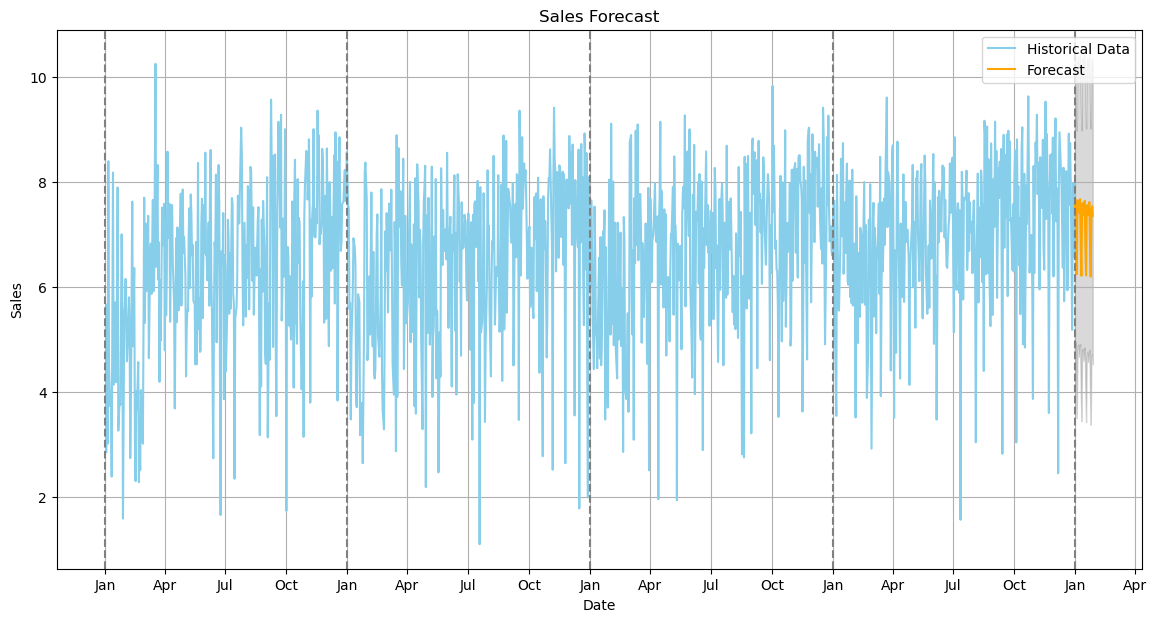

In [46]:
# Fitting the specific SARIMA(2, 0, 2)(2, 1, 1, 7) model
final_model = SARIMAX(log_sales_data_replaced, order=(2, 0, 2), seasonal_order=(2, 1, 1, 7))
sarima_fit_specific = final_model.fit(disp=False)

# Forecasting future values (e.g., 28 periods ahead)
forecast_periods = 28
forecast_results = sarima_fit_specific.get_forecast(steps=forecast_periods)
forecast_values = forecast_results.predicted_mean
confidence_intervals = forecast_results.conf_int()

# Getting the index for the forecast
forecast_index = log_sales_data_replaced.index[-1] + pd.DateOffset(1)
forecast_index = pd.date_range(forecast_index, periods=forecast_periods, freq='D')

# Plotting the forecast
plt.figure(figsize=(14, 7))
plt.plot(log_sales_data_replaced, label='Historical Data', color='skyblue')
plt.plot(forecast_index, forecast_values, label='Forecast', color='orange')
plt.fill_between(forecast_index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='k', alpha=.15)

# Setting the x-axis to display every third month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1, 13, 3)))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Adding vertical dashed lines to separate each year
for year in range(log_sales_data_replaced.index.year.min(), forecast_index.year.max() + 1):
    plt.axvline(pd.Timestamp(f'{year}-01-01'), color='gray', linestyle='--')

plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)

# Save the figure to the specified path
plt.savefig('Model Forecasting - 2.png')

plt.show()


### 4. Ljung-Box test

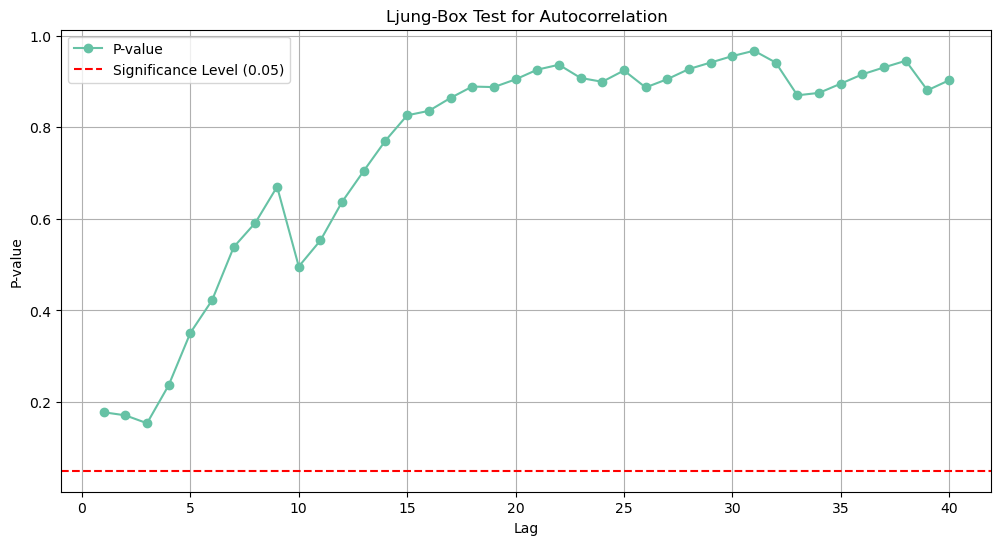

Lag 1: P-value 0.17766827262181198
Lag 2: P-value 0.17095745329549503
Lag 3: P-value 0.15368288504549074
Lag 4: P-value 0.23682096719737591
Lag 5: P-value 0.35109285198625934
Lag 6: P-value 0.42225460449732244
Lag 7: P-value 0.5384348563414828
Lag 8: P-value 0.5916207107396085
Lag 9: P-value 0.6701308532348653
Lag 10: P-value 0.4959145928715494
Lag 11: P-value 0.5529693825616908
Lag 12: P-value 0.6372043198513613
Lag 13: P-value 0.7048839556509866
Lag 14: P-value 0.7709217537539773
Lag 15: P-value 0.8260796449379484


In [48]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Assuming residuals are stored in a variable named residuals
residuals = sarima_fit_specific.resid

# Perform the Ljung-Box test
ljung_box_test_results = acorr_ljungbox(residuals, lags=40)  # 40 lags for the test
lb_stat = ljung_box_test_results['lb_stat']
lb_pvalue = ljung_box_test_results['lb_pvalue']

# Plotting the p-values
plt.figure(figsize=(12, 6))
plt.plot(lb_pvalue, marker='o', label='P-value')
plt.axhline(y=0.05, color='r', linestyle='--', label='Significance Level (0.05)')
plt.title('Ljung-Box Test for Autocorrelation')
plt.xlabel('Lag')
plt.ylabel('P-value')
plt.legend()
plt.grid(True)
plt.show()

# If needed, you can print the statistics
for lag, p_value in enumerate(lb_pvalue[:15], 1):  # Printing results for first 15 lags
    print(f"Lag {lag}: P-value {p_value}")


- **No Significant Autocorrelation:** The lack of significant autocorrelation in the residuals is a positive indication that the model has captured the underlying temporal dependencies in the data. 